# 1. Problem Statement<a id='Problem Statement'></a>

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor.  To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# 2. Table of Content  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>

- <a href='#Table of Contents'>2. Table of Contents</a>

- <a href='#Data Dictionary'>3. Data Dictionary</a>

- <a href='#Data Imports'>4. Library Imports</a>

- <a href='#Load Data'>5. Load Data</a>
    - <a href='#Rename Columns'>5.1 Rename columns</a>
    - <a href='#Rearrange columns'> 5.2 Rearrange columns</a>
    - <a href='#Check Missingness'>5.3 Check for missing values and duplicates</a>
    - <a href='#Treat Select Values'>5.4 Treat Columns with default values 'Select'</a>

- <a href='#Data Cleaning'>6. Data Cleaning</a>
    - <a href='#Drop missing values'>6.1 Drop columns with more than 30% missing values</a>
    - <a href='#Data Imputation'>6.2 Data Imputation</a>
    - <a href='#Treat outliers'>6.3 Treat Ouliers</a>
    - <a href='#Combine many category values'>6.4. Combine different categorical values of a feature into one</a>
    - <a href='#Drop one categorical value'>6.5 Drop columns with only one categorical value</a>
    - <a href='#Data retained'>6.6 Percentage of data retained after data cleaning</a>

- <a href='#EDA'>7. Exploratory Data Analysis</a>
    - <a href='#EDA Converted'>7.1 Check for the number imbalance of class - Converted</a>
    - <a href='#EDA Lead Origin'>7.2 Plot Lead Origin</a>
    - <a href='#EDA Lead Source'>7.3 Plot Lead Source</a>
    - <a href='#EDA Occupation'>7.4 Plot Occupation</a>
    - <a href='#EDA Last Activity'>7.5 Plot Last Acitivity</a>
    - <a href='#EDA DndEmail'>7.6 Plot Do not email</a>
    
- <a href='#Data Preparation'>8. Data Preparation for modeling</a>
    - <a href='#Drop LeadNumber ProspectId'>8.1 Drop features LeadNumber and ProspectId</a>
    - <a href='#Get dummies'>8.2 Convert categorical columns into dummy variables</a>
    - <a href='#Check Correlation'>8.3 Check Correlation</a>
    - <a href='#Create X and y'>8.4 Divide dataset into X and Y for model building</a>
    - <a href='#train test split'>8.5 Train - Test Split</a>
    - <a href='#Feature Scaling'>8.6 Feature Scaling</a>


- <a href='#Data Modeling'>9. Data Modeling</a> 
    - <a href='#First Model with RFE'>9.1 First Logistic Regression Model using stats model with all features</a>
    - <a href='#RFE'>9.2 Use RFE to get top 15 columns</a>
    - <a href='#Common Functions'>9.3 Functions to use RFE on fetures, build model and check VIF</a>
    - <a href='#Stats with RFE'>9.4 Build stats model using RFE selected features</a>
    - <a href='#Cutoff 0.5'>9.5 When cutoff is 0.5</a>
    - <a href='#Cutoff 0.36'>9.6 With 0.36 as cut-off point check train and test scores</a>
    - <a href='#Cutoff 0.35'>9.7 With 0.35 as cut-off point check metrics</a>
    - <a href='#Cutoff 0.37'>9.8 Lets take the cutoff as 0.37 and check for metrics</a>
    - <a href='#Lead Score Train data'>9.9 Lead Score on Train Data</a>
    - <a href='#Lead Score Test data'>9.10 Lead Score on Test Data</a>
    - <a href='#Lead Score Combined data'>9.11 Lead Score on Combined data set</a>

- <a href='#Subjective Questions'>10. Subjective Questions</a>

- <a href='#Conclusion and Recommendations'>11. Conclusion and Recommendations</a>

<h1>3. Data Dictionary of Lead Score Case Study Dataset</h1>  <a id='Data Dictionary'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

|Feature|Type|Description|RenamedAs|
|---|---|---|---|
|Prospect ID|object|A unique ID with which the customer is identified|ProspectId|
|Lead Number|int64|A lead number assigned to each lead procured|LeadNumber|
|Lead Origin|object|The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.|LeadOrigin|
|Lead Source|object|The source of the lead. Includes Google, Organic Search, Olark Chat, etc.|LeadSource|
|Do Not Email|object|An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.|DndEmail|
|Do Not Call|object|An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.|DndCall|
|Converted|int64|The target variable. Indicates whether a lead has been successfully converted or not.|Converted|
|TotalVisits|float64|The total number of visits made by the customer on the website.|TotalVisits|
|Total Time Spent on Website|int64|The total time spent by the customer on the website.|TotalWebsiteTime|
|Page Views Per Visit|float64|Average number of pages on the website viewed during the visits.|PagesPerVisit
|Last Activity|object|Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.|LastActivity|
|Country|object|The country of the customer.|Country|
|Specialization|object|The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.|Specialization|
|How did you hear about X Education|object|The source from which the customer heard about X Education.|HowHeard|
|What is your current occupation|object|Indicates whether the customer is a student, umemployed or employed.|Occupation|
|What matters most to you in choosing a course|object|An option selected by the customer indicating what is their main motto behind doing this course.|MattersMost|
|Search|object|Indicating whether the customer had seen the ad in any of the listed items.|Search|
|Magazine|object|Indicating whether the customer had seen the ad in any of the listed items.|Magazine|
|Newspaper Article|object|Indicating whether the customer had seen the ad in any of the listed items.|PaperArticle|
|X Education Forums|object|Indicating whether the customer had seen the ad in any of the listed items.|EducationForum|
|Newspaper|object|Indicating whether the customer had seen the ad in any of the listed items.|Newspaper|
|Digital Advertisement|object|Indicating whether the customer had seen the ad in any of the listed items.|DigitalAd|
|Through Recommendations|object|Indicates whether the customer came in through recommendations.|Recommendation|
|Receive More Updates About Our Courses|object|Indicates whether the customer chose to receive more updates about the courses.|ReceiveCourseUpdate|
|Tags|object|Tags assigned to customers indicating the current status of the lead.|Tags|
|Lead Quality|object|Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.|LeadQuality|
|Update me on Supply Chain Content|object|Indicates whether the customer wants updates on the Supply Chain Content.|UpdateSupplyChain|
|Get updates on DM Content|object|Indicates whether the customer wants updates on the DM Content.|UpdateDMContent|
|Lead Profile|object|A lead level assigned to each customer based on their profile.|LeadProfile|
|City|object|The city of the customer.|City|
|Asymmetrique Activity Index|object|An index and score assigned to each customer based on their activity and their profile|ActivityIndex|
|Asymmetrique Profile Index|object|An index and score assigned to each customer based on their activity and their profile|ProfileIndex|
|Asymmetrique Activity Score|float64|An index and score assigned to each customer based on their activity and their profile|ActivityScore|
|Asymmetrique Profile Score|float64|An index and score assigned to each customer based on their activity and their profile|ProfileScore|
|I agree to pay the amount through cheque|object|Indicates whether the customer has agreed to pay the amount through cheque or not.|ChequePayment|
|A free copy of Mastering The Interview|object|Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.|FreeCopy|
|Last Notable Activity|object|The last notable acitivity performed by the student.|LastNotableActivity|

# 4. Library Imports   <a id='Data Imports'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('ggplot')

In [615]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# 5. Load Data <a id='Load Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [616]:
leadscore_df = pd.read_csv('./dataset/Leads.csv')
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [617]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Lets create a variable to store original rows information before any data cleaning/treatment

In [618]:
original_rows = leadscore_df.shape[0]
print('No of original rows: {0}'.format(original_rows))

No of original rows: 9240


## 5.1 Lets rename columns <a id='Rename Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [619]:
leadscore_df.rename(columns={'Converted':'Converted',
                            'Prospect ID':'ProspectId',
                            'Lead Number':'LeadNumber',
                            'Lead Origin':'LeadOrigin',
                            'Lead Source':'LeadSource',
                            'Do Not Email':'DndEmail',
                            'Do Not Call':'DndCall',
                            'TotalVisits':'TotalVisits',
                            'Total Time Spent on Website':'TotalWebsiteTime',
                            'Page Views Per Visit':'PagesPerVisit',
                            'Last Activity':'LastActivity',
                            'Country':'Country',
                            'Specialization':'Specialization',
                            'How did you hear about X Education':'HowHeard',
                            'What is your current occupation':'Occupation',
                            'What matters most to you in choosing a course':'MattersMost',
                            'Search':'Search',
                            'Magazine':'Magazine',
                            'Newspaper Article':'PaperArticle',
                            'X Education Forums':'EducationForum',
                            'Newspaper':'Newspaper',
                            'Digital Advertisement':'DigitalAd',
                            'Through Recommendations':'Recommendation',
                            'Receive More Updates About Our Courses':'ReceiveCourseUpdate',
                            'Tags':'Tags',
                            'Lead Quality':'LeadQuality',
                            'Update me on Supply Chain Content':'UpdateSupplyChain',
                            'Get updates on DM Content':'UpdateDMContent',
                            'Lead Profile':'LeadProfile',
                            'City':'City',
                            'Asymmetrique Activity Index':'ActivityIndex',
                            'Asymmetrique Profile Index':'ProfileIndex',
                            'Asymmetrique Activity Score':'ActivityScore',
                            'Asymmetrique Profile Score':'ProfileScore',
                            'I agree to pay the amount through cheque':'ChequePayment',
                            'A free copy of Mastering The Interview':'FreeCopy',
                            'Last Notable Activity':'LastNotableActivity'},
                   inplace=True)       

## 5.2 Also lets bring target column in front <a id='Rearrange columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [620]:
col_list = list(leadscore_df.columns)
col_list.insert(0,col_list.pop(col_list.index('Converted')))
leadscore_df = leadscore_df.loc[:,col_list]

In [621]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Converted              9240 non-null int64
ProspectId             9240 non-null object
LeadNumber             9240 non-null int64
LeadOrigin             9240 non-null object
LeadSource             9204 non-null object
DndEmail               9240 non-null object
DndCall                9240 non-null object
TotalVisits            9103 non-null float64
TotalWebsiteTime       9240 non-null int64
PagesPerVisit          9103 non-null float64
LastActivity           9137 non-null object
Country                6779 non-null object
Specialization         7802 non-null object
HowHeard               7033 non-null object
Occupation             6550 non-null object
MattersMost            6531 non-null object
Search                 9240 non-null object
Magazine               9240 non-null object
PaperArticle           9240 non-null object
EducationForum         9240 non-null object
Newspaper     

## 5.3 Check for missing values and duplicates<a id='Check Missingness'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [622]:
pd.DataFrame([[leadscore_df.shape],
            [leadscore_df.isnull().sum().sum()],
             [leadscore_df.duplicated().sum()]],
            columns = ['Application Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

,Application Data Set
Shape,"(9240, 37)"
Missingness,41039
Duplicates,0


## Lets view first few rows

In [623]:
leadscore_df.head()

,Converted,ProspectId,LeadNumber,LeadOrigin,LeadSource,DndEmail,DndCall,TotalVisits,TotalWebsiteTime,PagesPerVisit,LastActivity,Country,Specialization,HowHeard,Occupation,MattersMost,Search,Magazine,PaperArticle,EducationForum,Newspaper,DigitalAd,Recommendation,ReceiveCourseUpdate,Tags,LeadQuality,UpdateSupplyChain,UpdateDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,ChequePayment,FreeCopy,LastNotableActivity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,1,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 5.4 There are many columns with value 'Select' which is we will treat as null values<a id='Treat Select Values'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- This is beacuse by default the 'Select' option might be available and user might not have chosen any value for those variables
- Due to which by default 'Select' would have got inserted as value for that column
- So lets replace this value with null value across all columns where this value is present

In [624]:
leadscore_df[leadscore_df == 'Select'].count()

Converted                 0
ProspectId                0
LeadNumber                0
LeadOrigin                0
LeadSource                0
DndEmail                  0
DndCall                   0
TotalVisits               0
TotalWebsiteTime          0
PagesPerVisit             0
LastActivity              0
Country                   0
Specialization         1942
HowHeard               5043
Occupation                0
MattersMost               0
Search                    0
Magazine                  0
PaperArticle              0
EducationForum            0
Newspaper                 0
DigitalAd                 0
Recommendation            0
ReceiveCourseUpdate       0
Tags                      0
LeadQuality               0
UpdateSupplyChain         0
UpdateDMContent           0
LeadProfile            4146
City                   2249
ActivityIndex             0
ProfileIndex              0
ActivityScore             0
ProfileScore              0
ChequePayment             0
FreeCopy            

## Observations from above cell
- Columns - Specialization, HowHeard, LeadProfile, City have values as 'Select'
- Lets replace these values

In [625]:
leadscore_df.replace('Select',np.NaN,inplace=True)
leadscore_df[leadscore_df == 'Select'].count()

Converted              0
ProspectId             0
LeadNumber             0
LeadOrigin             0
LeadSource             0
DndEmail               0
DndCall                0
TotalVisits            0
TotalWebsiteTime       0
PagesPerVisit          0
LastActivity           0
Country                0
Specialization         0
HowHeard               0
Occupation             0
MattersMost            0
Search                 0
Magazine               0
PaperArticle           0
EducationForum         0
Newspaper              0
DigitalAd              0
Recommendation         0
ReceiveCourseUpdate    0
Tags                   0
LeadQuality            0
UpdateSupplyChain      0
UpdateDMContent        0
LeadProfile            0
City                   0
ActivityIndex          0
ProfileIndex           0
ActivityScore          0
ProfileScore           0
ChequePayment          0
FreeCopy               0
LastNotableActivity    0
dtype: int64

## Look for missing value percentage

In [626]:
leadscore_df[leadscore_df.columns[leadscore_df.isnull().any()]].isnull().sum()

LeadSource          36
TotalVisits        137
PagesPerVisit      137
LastActivity       103
Country           2461
Specialization    3380
HowHeard          7250
Occupation        2690
MattersMost       2709
Tags              3353
LeadQuality       4767
LeadProfile       6855
City              3669
ActivityIndex     4218
ProfileIndex      4218
ActivityScore     4218
ProfileScore      4218
dtype: int64

In [627]:
#In terms of missing%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Converted,Converted,0.000000
ProspectId,ProspectId,0.000000
LeadNumber,LeadNumber,0.000000
LeadOrigin,LeadOrigin,0.000000
LeadSource,LeadSource,0.389610
DndEmail,DndEmail,0.000000
DndCall,DndCall,0.000000
TotalVisits,TotalVisits,1.482684
TotalWebsiteTime,TotalWebsiteTime,0.000000
PagesPerVisit,PagesPerVisit,1.482684


In [628]:
### Validate the total sum of missing values
leadscore_df[leadscore_df.columns[leadscore_df.isnull().any()]].isnull().sum().sum()

54419

Get the list of variables with more than 30% missing values

In [629]:
#Get the list of columns with missing% > 30%
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>30]['column_name'])
missing_data_cols

['Specialization',
 'HowHeard',
 'Tags',
 'LeadQuality',
 'LeadProfile',
 'City',
 'ActivityIndex',
 'ProfileIndex',
 'ActivityScore',
 'ProfileScore']

# 6. Data Cleaning<a id='Data Cleaning'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 6.1 Lets drop columns with more than 30% missing values<a id='Drop missing values'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [630]:
print('number of columns before dropping high pcnt missing value columns are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=missing_data_cols,inplace=True)
print('number of columns after dropping high pcnt missing value columns are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping high pcnt missing value columns are: 37
number of columns after dropping high pcnt missing value columns are: 27


## 6.2 Lets do Data Imputation<a id='Data Imputation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

Please note that we will use <b><font size=3 color="blue">SimpleImputer</font></b> class to impute missing values in case it has to be replaced with most frequent value
- The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located
- Source https://scikit-learn.org/stable/modules/impute.html

## Since we have dropped columns with more than 30% missing values, we still have many columns left for data cleaning
- Lets check for such columns

In [631]:
#In terms of missing%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Converted,Converted,0.000000
ProspectId,ProspectId,0.000000
LeadNumber,LeadNumber,0.000000
LeadOrigin,LeadOrigin,0.000000
LeadSource,LeadSource,0.389610
DndEmail,DndEmail,0.000000
DndCall,DndCall,0.000000
TotalVisits,TotalVisits,1.482684
TotalWebsiteTime,TotalWebsiteTime,0.000000
PagesPerVisit,PagesPerVisit,1.482684


In [632]:
#Get the list of columns with missing% > 2%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>2]['column_name'])
print('No of columns with data value missing pect > 2% are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing pect > 2% are: 3


['Country', 'Occupation', 'MattersMost']

## Function to plot frequency and percentage wrt feature

In [633]:
def plot_frequency_and_percentage(feature,leads_df,category_df,another_row=False,height=8,ylabels=[]):
    
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,height*2))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    
    ## plot the frequency plot for each category in the required column
    ax1.set_title('Frequency Plot of {0}'.format(feature),color='blue')
    ax1.set_ylabel(feature) 
    ax1.set_xlabel('count')
    sns.countplot(y=feature,data=category_df.sort_values(by=feature),ax=ax1,color='green');
    if len(ylabels)>0:
        ax1.set_yticklabels(ylabels);
    
    ## plot the value percentage in each sub-category wrt the label
    ax2.set_title('Lead Converted label %',color='blue')
    ax2.set_ylabel(feature) 
    ax2.set_xlabel('percentage')
    leads_df.iloc[1].sort_values().plot(kind='barh',ax=ax2,color='orange');
    if len(ylabels)>0:
        ax2.set_yticklabels(ylabels)


## 1. Lets check for column Country

In [634]:
leadscore_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Netherlands                2
Bangladesh                 2
Belgium                    2
Italy                      2
China                      2
Indonesia                  1
Malaysia                   1
Sri Lanka                  1
Vietnam                    1
Russia                     1
Tanzania                   1
Liberia       

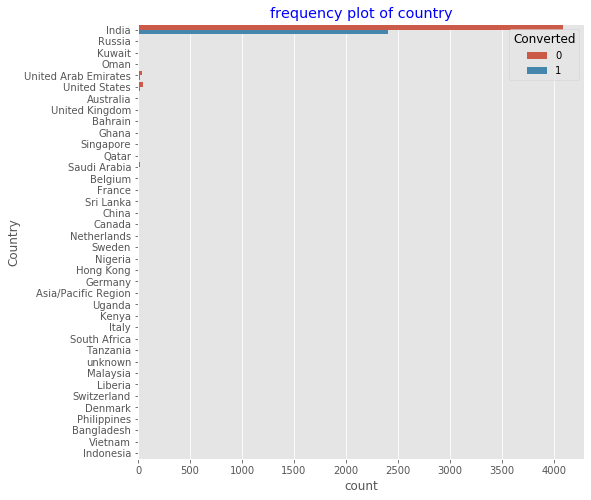

In [635]:
plt.figure(figsize=(8,8))
plt.title('frequency plot of country',color='blue')
sns.countplot(y='Country',hue='Converted',data=leadscore_df);

### Since most of the values are 'India' and there is very less variation in data in this column Country
- So we will drop this column

In [636]:
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['Country'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 27
number of columns after dropping column "Country" are: 26


## 2. Lets check for column Occupation

In [637]:
leadscore_df['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

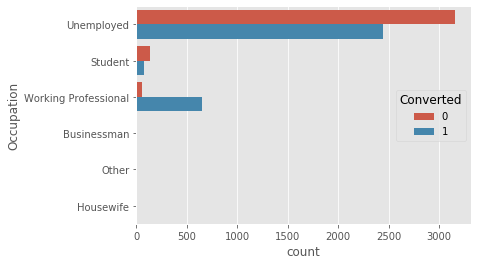

In [638]:
sns.countplot(y='Occupation',hue='Converted',data=leadscore_df);

In [639]:
leadscore_df['Occupation'].isnull().sum()

2690

### Assumptions
From above cell it can be seen that 
- Probably the user didnt find relevant option to select the value for Occupation so would have left the option as blank
- So instead of replacing the value with 'Unemployed' as most frequent value we will replace it with value <b>'Other'</b>

In [640]:
#replace null values with value 'Unemployed' in leadscore_df
print('Number of observations with null values in column Occupation: {0}'.format(
    leadscore_df['Occupation'].isnull().sum()))

leadscore_df['Occupation'].replace({np.NaN:'Other'},inplace=True)
print('Number of observations with null values in column Occupation after imputation: {0}'.format(
    leadscore_df['Occupation'].isnull().sum()))

Number of observations with null values in column Occupation: 2690
Number of observations with null values in column Occupation after imputation: 0


## 3. Lets check for column MattersMost

In [641]:
leadscore_df['MattersMost'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: MattersMost, dtype: int64

In [642]:
leadscore_df['MattersMost'].isnull().sum()

2709

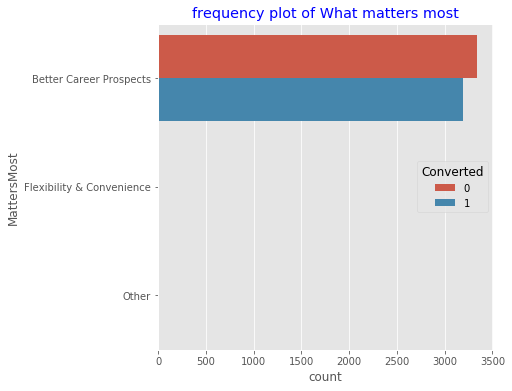

In [643]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of What matters most',color='blue')
sns.countplot(y='MattersMost',hue='Converted',data=leadscore_df);

### It can be seen that most of the values are 'Better Career Prospects' with only 3 observations having different values
- Since there is very less variation in data so this column will not add much value during our analysis
- We can therefore drop this column

In [644]:
print('number of columns before dropping column "MattersMost" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['MattersMost'],inplace=True)
print('number of columns after dropping column "MattersMost" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "MattersMost" are: 26
number of columns after dropping column "MattersMost" are: 25


# Now lets check for missing values with missing value percentage > 0

In [645]:
#Get the list of columns with missing% > 0%
percent_missing = leadscore_df.isnull().sum() * 100 / len(leadscore_df)
missing_value_df = pd.DataFrame({'column_name': leadscore_df.columns,
                                 'percent_missing': percent_missing})
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])
print('No of columns with data value missing prct are: {0}'.format(len(missing_data_cols)))
missing_data_cols

No of columns with data value missing prct are: 4


['LeadSource', 'TotalVisits', 'PagesPerVisit', 'LastActivity']

In [646]:
missing_value_df[missing_value_df['percent_missing']>0]

,column_name,percent_missing
LeadSource,LeadSource,0.389610
TotalVisits,TotalVisits,1.482684
PagesPerVisit,PagesPerVisit,1.482684
LastActivity,LastActivity,1.114719


## 4. Lets check for column LeadSource

In [647]:
leadscore_df['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
WeLearn                 1
blog                    1
Name: LeadSource, dtype: int64

### Observations from above cell
- There are two values 'Google' and 'google' which refer to same lead source. So we will replace 'google' with 'Google'

In [648]:
print('number of observations with value google: {0}'.format(
    leadscore_df[leadscore_df['LeadSource']=='google']['LeadSource'].count()))
leadscore_df['LeadSource'].replace('google','Google',inplace=True)
print('number of observations with value google: {0}'.format(
    leadscore_df[leadscore_df['LeadSource']=='google']['LeadSource'].count()))

number of observations with value google: 5
number of observations with value google: 0


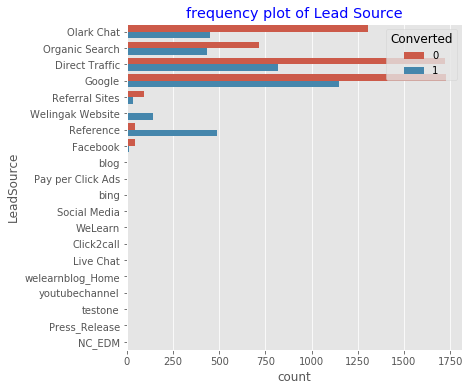

In [649]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='LeadSource',hue='Converted',data=leadscore_df);

### Since below categories have very less observations so lets combine the below categories and create new category value - Others
- bing
- google
- Click2call
- Social Media
- Press_Release
- Live Chat
- WeLearn
- youtubechannel
- welearnblog_Home
- NC_EDM
- testone
- Pay per Click Ads
- blog

In [650]:
leadscore_df['LeadSource'] = leadscore_df['LeadSource'].replace(
    ['bing','google','Click2call','Social Media','Press_Release','Live Chat','WeLearn','youtubechannel',
     'welearnblog_Home','NC_EDM','testone','Pay per Click Ads','blog'],'Others')
leadscore_df['LeadSource'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: LeadSource, dtype: int64

In [651]:
leadscore_df['LeadSource'].isnull().sum()

36

In [652]:
## replace null values with most frequent value
print('Number of observations with null values in column LeadSource: {0}'.format(
    leadscore_df['LeadSource'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(leadscore_df[['LeadSource']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

leadscore_df['LeadSource'] = imp.transform(leadscore_df[['LeadSource']]).ravel()

print('Number of observations with null values in column LeadSource after imputation: {0}'.format(
    leadscore_df['LeadSource'].isnull().sum()))

Number of observations with null values in column LeadSource: 36
Most frequent value is : Google
Number of observations with null values in column LeadSource after imputation: 0


## 6.3 Treat Ouliers<a id='Treat outliers'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 5. Lets check for column TotalVisits

In [653]:
leadscore_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [654]:
leadscore_df['TotalVisits'].isnull().sum()

137

In [655]:
leadscore_df.shape

(9240, 25)

## Since its a numeric feature so lets also check mean, median, std etc.

In [656]:
totalvisits_med = leadscore_df['TotalVisits'].median()
totalvisits_med

3.0

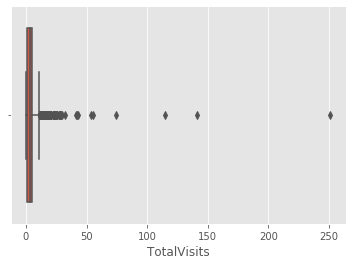

In [657]:
sns.boxplot(leadscore_df['TotalVisits']);

### Observations from above cell
- As can be seen there are 137 observations where value is missing for column TotalVisits
- Because of the presence of outliers we will replace the missing values with median instead of mean

### Replace null values

In [658]:
#replace null values with value 3.0 in leadTotalVisits_df
print('Number of observations with null values in column TotalVisits: {0}'.format(
    leadscore_df['TotalVisits'].isnull().sum()))
leadscore_df['TotalVisits'].replace({np.NaN:totalvisits_med},inplace=True)
print('Number of observations with null values in column TotalVisits after imputation: {0}'.format(
    leadscore_df['TotalVisits'].isnull().sum()))

Number of observations with null values in column TotalVisits: 137
Number of observations with null values in column TotalVisits after imputation: 0


### Lets treat outliers in TotalVisits

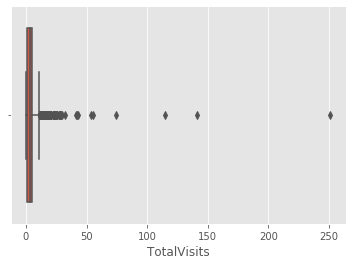

In [659]:
sns.boxplot(leadscore_df['TotalVisits']);

In [660]:
leadscore_df['TotalVisits'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

TotalVisits 99th percentile value: 17.0


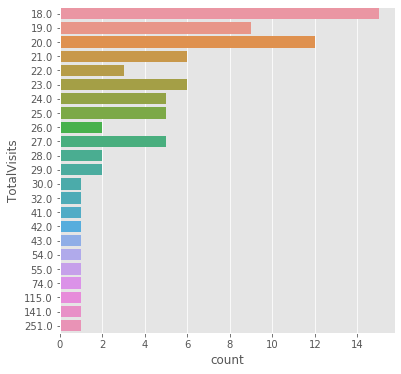

In [661]:
print('TotalVisits 99th percentile value: {0}'.format(leadscore_df['TotalVisits'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=leadscore_df[leadscore_df['TotalVisits']>17]['TotalVisits'].sort_values());

### Observations from above plot
- There are many outliers in 99th percentile
- Since data values are gradually increasing so we will keep the upper limit of data till 55. We will drop the remaining rows with TotalVisits>55

In [662]:
leadscore_df[leadscore_df['TotalVisits']>55]['TotalVisits'].count()

4

### Lets drop these 4 rows where TotalVisits>55

In [663]:
print('shape of dataframe before dropping rows: {0}'.format(leadscore_df.shape))
print('Total number of rows to be dropped: {0}'.format(
    leadscore_df[leadscore_df['TotalVisits']>55]['TotalVisits'].count()))
leadscore_df.drop(index=leadscore_df[leadscore_df['TotalVisits']>55].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(leadscore_df.shape))

shape of dataframe before dropping rows: (9240, 25)
Total number of rows to be dropped: 4
shape of dataframe after dropping rows: (9236, 25)


## 6. Lets check for column PagesPerVisit

In [664]:
leadscore_df['PagesPerVisit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
4.33        9
2.80        9
14.00       9
3.25        8
1.60        8
2.17        8
13.00       6
2.40        6
12.00       5
1.20        5
3.40        4
15.00       4
1.83        4
1.71        4
2.60        4
1.43        4
4.25        3
5.67        3
1.38        3
16.00       3
1.57        3
1.78        3
4.75        3
2.22        2
1.22        2
7.50        2
5.33        2
2.83        2
1.23        2
3.60        2
3.75        2
3.20        2
5.25        2
2.09        2
1.56        2
5.40        2
2.71        2
1.14        2
8.33        1
2.63        1
24.00 

In [665]:
leadscore_df['PagesPerVisit'].isnull().sum()

137

## Since its a numeric feature so lets also check mean, median, std etc.

In [666]:
pagesvist_med = leadscore_df['PagesPerVisit'].median()
pagesvist_med

2.0

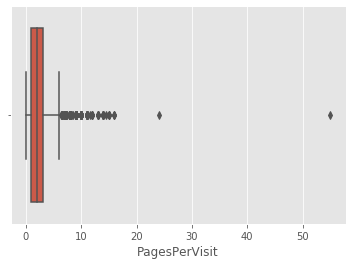

In [667]:
sns.boxplot(leadscore_df['PagesPerVisit']);

In [668]:
leadscore_df['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9099.000000
mean        2.360701
std         2.157994
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

### Observations from above cell
- As can be seen there are 137 observations where value is missing for column PagesPerVisit
- Because of the presence of outliers we will replace the missing values with median instead of mean

### Replace null values

In [669]:
#replace null values with value 2.0 in leadPagesPerVisit_df
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    leadscore_df['PagesPerVisit'].isnull().sum()))
leadscore_df['PagesPerVisit'].replace({np.NaN:pagesvist_med},inplace=True)
print('Number of observations with null values in column PagesPerVisit: {0}'.format(
    leadscore_df['PagesPerVisit'].isnull().sum()))

Number of observations with null values in column PagesPerVisit: 137
Number of observations with null values in column PagesPerVisit: 0


### Lets treat outliers in TotalVisits

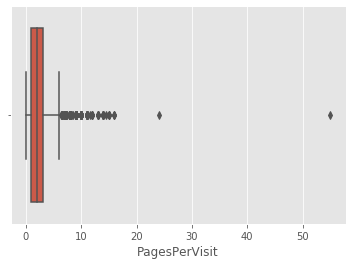

In [670]:
sns.boxplot(leadscore_df['PagesPerVisit']);

In [671]:
leadscore_df['PagesPerVisit'].describe([0,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9236.000000
mean        2.355351
std         2.142371
min         0.000000
0%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: PagesPerVisit, dtype: float64

TotalVisits 99th percentile value: 9.0


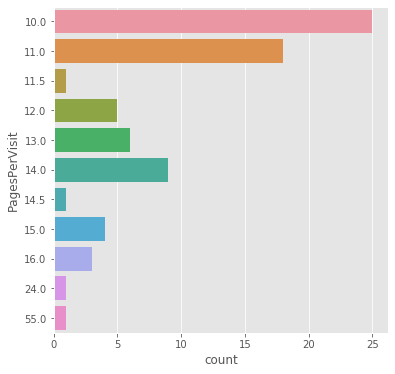

In [672]:
print('TotalVisits 99th percentile value: {0}'.format(leadscore_df['PagesPerVisit'].quantile(0.99)))
plt.figure(figsize=(6,6));
sns.countplot(y=leadscore_df[leadscore_df['PagesPerVisit']>9]['PagesPerVisit'].sort_values());

### Observations from above plot
- There are many outliers in 99th percentile
- Since data values are gradually increasing so we will keep the upper limit of data till 16. We will drop the remaining rows with PagesPerVisit>16

In [673]:
leadscore_df[leadscore_df['PagesPerVisit']>16]['PagesPerVisit'].count()

2

### Lets drop these 2 rows where PagesPerVisit>16

In [674]:
print('shape of dataframe before dropping rows: {0}'.format(leadscore_df.shape))
print('Total number of rows to be dropped: {0}'.format(
    leadscore_df[leadscore_df['PagesPerVisit']>16]['PagesPerVisit'].count()))
leadscore_df.drop(index=leadscore_df[leadscore_df['PagesPerVisit']>16].index,inplace=True)
print('shape of dataframe after dropping rows: {0}'.format(leadscore_df.shape))

shape of dataframe before dropping rows: (9236, 25)
Total number of rows to be dropped: 2
shape of dataframe after dropping rows: (9234, 25)


## 6.4. Combine different categorical values of a feature into one<a id='Combine many category values'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 7. Lets check for column LastActivity

In [675]:
leadscore_df['LastActivity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          634
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: LastActivity, dtype: int64

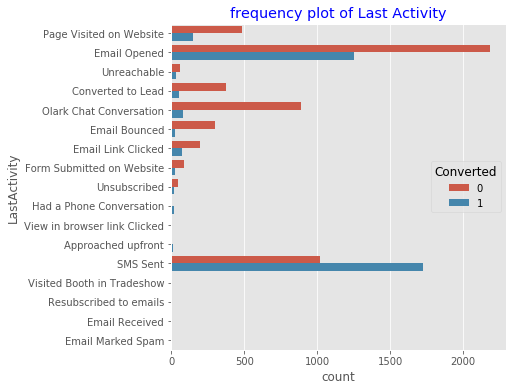

In [676]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='LastActivity',hue='Converted',data=leadscore_df);

### Since below categories have very less observations so lets combine the below categories and create new category value - Others
- Unreachable
- Unsubscribed
- Had a Phone Conversation
- Approached upfront
- View in browser link Clicked
- Email Marked Spam
- Email Received
- Resubscribed to emails
- Visited Booth in Tradeshow

In [677]:
leadscore_df['LastActivity'] = leadscore_df['LastActivity'].replace(
    ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
     'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')
leadscore_df['LastActivity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       634
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

In [678]:
leadscore_df['LastActivity'].isnull().sum()

103

In [679]:
## replace null values
print('Number of observations with null values in column LastActivity: {0}'.format(
    leadscore_df['LastActivity'].isnull().sum()))

# Use SimpleImputer class to impute missing values
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(leadscore_df[['LastActivity']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

leadscore_df['LastActivity'] = imp.transform(leadscore_df[['LastActivity']]).ravel()

print('Number of observations with null values in column LastActivity after imputation: {0}'.format(
    leadscore_df['LastActivity'].isnull().sum()))

Number of observations with null values in column LastActivity: 103
Most frequent value is : Email Opened
Number of observations with null values in column LastActivity after imputation: 0


In [680]:
## Check for information now
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 25 columns):
Converted              9234 non-null int64
ProspectId             9234 non-null object
LeadNumber             9234 non-null int64
LeadOrigin             9234 non-null object
LeadSource             9234 non-null object
DndEmail               9234 non-null object
DndCall                9234 non-null object
TotalVisits            9234 non-null float64
TotalWebsiteTime       9234 non-null int64
PagesPerVisit          9234 non-null float64
LastActivity           9234 non-null object
Occupation             9234 non-null object
Search                 9234 non-null object
Magazine               9234 non-null object
PaperArticle           9234 non-null object
EducationForum         9234 non-null object
Newspaper              9234 non-null object
DigitalAd              9234 non-null object
Recommendation         9234 non-null object
ReceiveCourseUpdate    9234 non-null object
UpdateSupplyCh

## All null values have been treated
- Lets now check for the columns with unique values

In [681]:
leadscore_df.nunique()

Converted                 2
ProspectId             9234
LeadNumber             9234
LeadOrigin                5
LeadSource                9
DndEmail                  2
DndCall                   2
TotalVisits              36
TotalWebsiteTime       1730
PagesPerVisit           108
LastActivity              9
Occupation                6
Search                    2
Magazine                  1
PaperArticle              2
EducationForum            2
Newspaper                 2
DigitalAd                 2
Recommendation            2
ReceiveCourseUpdate       1
UpdateSupplyChain         1
UpdateDMContent           1
ChequePayment             1
FreeCopy                  2
LastNotableActivity      16
dtype: int64

## 6.5 Drop columns with only one categorical value<a id='Drop one categorical value'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Lets Check for columns with only one unique value

In [682]:
leadscore_df['Magazine'].value_counts()

No    9234
Name: Magazine, dtype: int64

In [683]:
leadscore_df['ReceiveCourseUpdate'].value_counts()

No    9234
Name: ReceiveCourseUpdate, dtype: int64

In [684]:
leadscore_df['UpdateSupplyChain'].value_counts()

No    9234
Name: UpdateSupplyChain, dtype: int64

In [685]:
leadscore_df['UpdateDMContent'].value_counts()

No    9234
Name: UpdateDMContent, dtype: int64

In [686]:
leadscore_df['ChequePayment'].value_counts()

No    9234
Name: ChequePayment, dtype: int64

### Observation from above cells
- Since below listed columns dont add any variance in data so it wont be helpful in modeling. Based on this we can drop these columns
    - Magazine
    - ReceiveCourseUpdate
    - UpdateSupplyChain
    - UpdateDMContent
    - ChequePayment

In [687]:
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['Magazine','ReceiveCourseUpdate','UpdateSupplyChain','UpdateDMContent',
                           'ChequePayment'], inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 25
number of columns after dropping column "Country" are: 20


## 6.6 Percentage of data retained after data cleaning<a id='Data retained'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [688]:
(leadscore_df.shape[0]/original_rows)*100

99.93506493506493

# 7. Exploratory Data Analysis<a id='EDA'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [689]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 20 columns):
Converted              9234 non-null int64
ProspectId             9234 non-null object
LeadNumber             9234 non-null int64
LeadOrigin             9234 non-null object
LeadSource             9234 non-null object
DndEmail               9234 non-null object
DndCall                9234 non-null object
TotalVisits            9234 non-null float64
TotalWebsiteTime       9234 non-null int64
PagesPerVisit          9234 non-null float64
LastActivity           9234 non-null object
Occupation             9234 non-null object
Search                 9234 non-null object
PaperArticle           9234 non-null object
EducationForum         9234 non-null object
Newspaper              9234 non-null object
DigitalAd              9234 non-null object
Recommendation         9234 non-null object
FreeCopy               9234 non-null object
LastNotableActivity    9234 non-null object
dtypes: float6

## 7.1 Check for the number imbalance of class - Converted<a id='EDA Converted'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- As per data dictionary - Target variable value description:
     - 1 - indicates lead has been successfully converted 
     - 0 - indicates lead has not been converted 

In [690]:
leadscore_df['Converted'].value_counts()

0    5675
1    3559
Name: Converted, dtype: int64

In [691]:
leadscore_df['Converted'].value_counts(1)

0    0.614577
1    0.385423
Name: Converted, dtype: float64

In [692]:
# Print percentage Value "0" and "1" in Target column
print('Value "0" in Target column percentage: {0:.2%}'.format(leadscore_df['Converted'].value_counts(1)[0]))
print('Value "1" in Target column percentage: {0:.2%}'.format(leadscore_df['Converted'].value_counts(1)[1]))

Value "0" in Target column percentage: 61.46%
Value "1" in Target column percentage: 38.54%


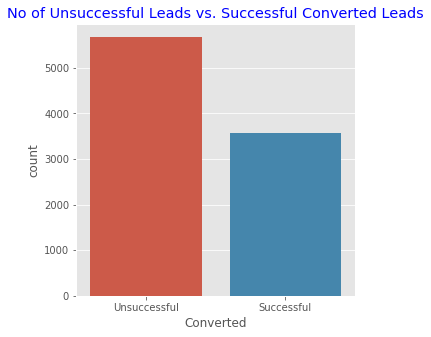

In [693]:
plt.figure(figsize=(5,5))
sns.countplot(leadscore_df['Converted']);
plt.title('No of Unsuccessful Leads vs. Successful Converted Leads',color='blue')
plt.xticks(np.arange(2),('Unsuccessful','Successful'));
#plt.legend(['0 - non-Converted','1 - Converted']);

# Obseravtion from above plot
- The Target class is not highly imbalanced with 
    - 61.46% of observations as "0" - labeled as non-Converted or unsuccessful leads
    - 38.54% of observations as "1" - labeled as Converted or successful leads

## 7.2 Lets plot Lead Origin<a id='EDA Lead Origin'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [694]:
leadscore_df['LeadOrigin'].value_counts()

Landing Page Submission    4881
API                        3579
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: LeadOrigin, dtype: int64

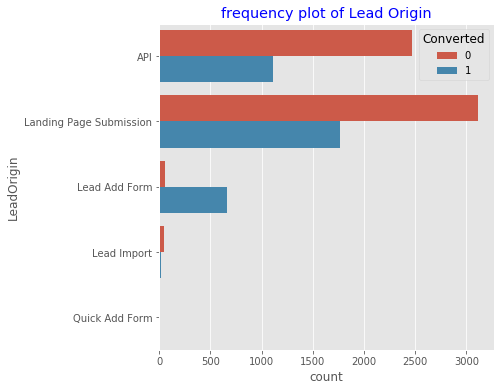

In [695]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Origin',color='blue')
sns.countplot(y='LeadOrigin',hue='Converted',data=leadscore_df);

In [696]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LeadOrigin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadOrigin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,68.87,63.8,7.52,76.36,0.0
1,31.13,36.2,92.48,23.64,100.0


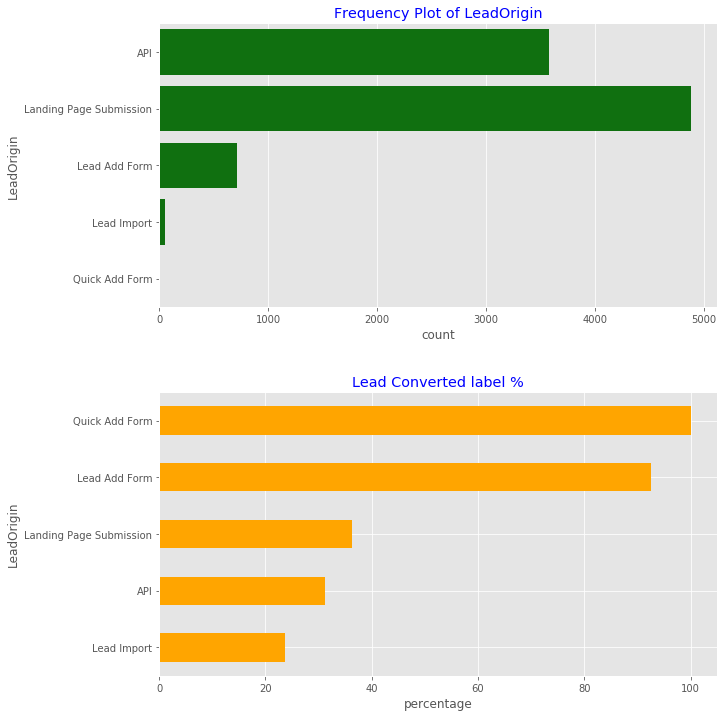

In [697]:
plot_frequency_and_percentage('LeadOrigin',crosstab_df,leadscore_df.sort_values(
    by='LeadOrigin',ascending=False),True,6)

### Observations from above plot
- Maximum observations have Lead Origin option as 'Landing Page Submission'
- Lead Origin with 'Quick Add Form' is successfully converted and there is only one observation with such Lead Origin
- 'Lead Add Form' comparatively has the highest lead conversion rate 

## 7.3 Lets plot Lead Source<a id='EDA Lead Source'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [698]:
leadscore_df['LeadSource'].value_counts()

Google              2909
Direct Traffic      2539
Olark Chat          1755
Organic Search      1153
Reference            534
Welingak Website     142
Referral Sites       124
Facebook              55
Others                23
Name: LeadSource, dtype: int64

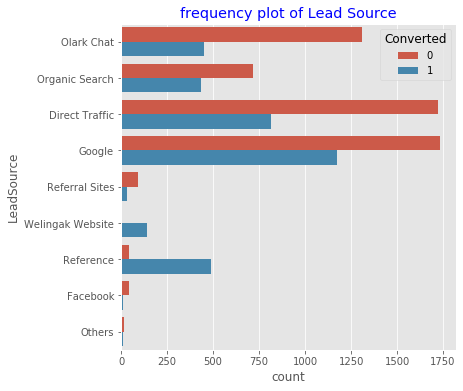

In [699]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='LeadSource',hue='Converted',data=leadscore_df);

In [700]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LeadSource']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LeadSource,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,,
0,67.82,76.36,59.57,74.47,62.27,60.87,8.24,75.0,1.41
1,32.18,23.64,40.43,25.53,37.73,39.13,91.76,25.0,98.59


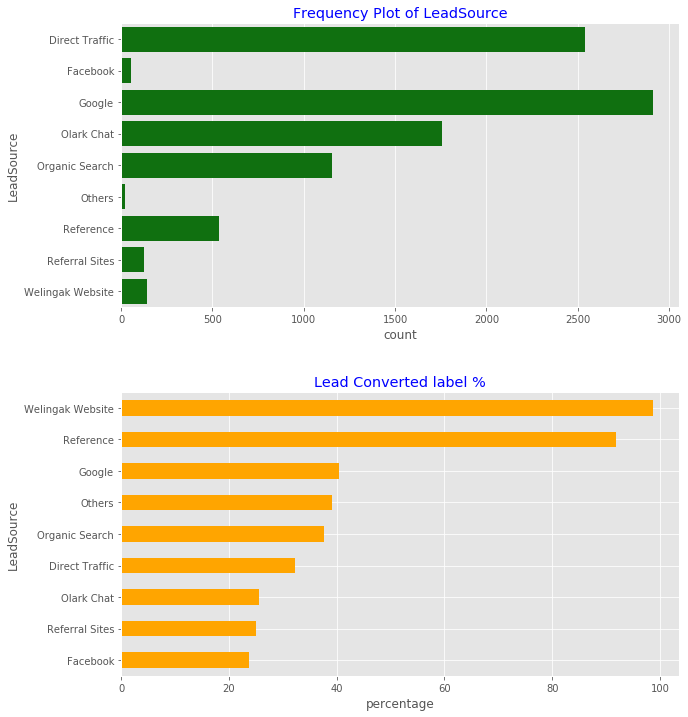

In [701]:
plot_frequency_and_percentage('LeadSource',crosstab_df,leadscore_df.sort_values(
    by='LeadSource',ascending=False),True,6)

### Observations from above plot
- Maximum leads are generated from 'Google' followed by 'Direct Traffic'
- 'Welingak Website' comparatively has the highest successful lead conversion rate
- Focus should be more on 'Facebook', 'Referral Sites', 'Olark Chat' to improve lead conversion rate

## 7.4 Lets plot Occupation<a id='EDA Occupation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [702]:
leadscore_df['Occupation'].value_counts()

Unemployed              5596
Other                   2704
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

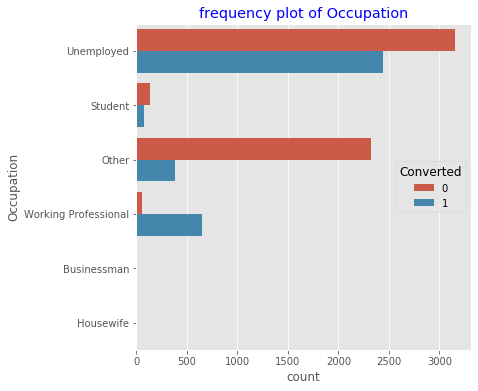

In [703]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Occupation',color='blue')
sns.countplot(y='Occupation',hue='Converted',data=leadscore_df);

In [704]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['Occupation']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Converted,,,,,,
0,37.5,0.0,85.98,62.86,56.4,8.36
1,62.5,100.0,14.02,37.14,43.6,91.64


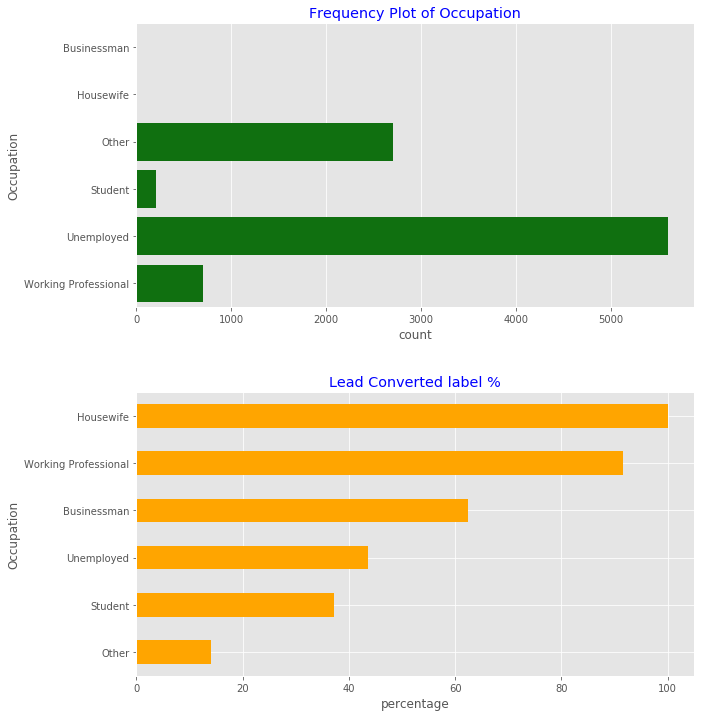

In [705]:
plot_frequency_and_percentage('Occupation',crosstab_df,leadscore_df.sort_values(
    by='Occupation',ascending=False),True,6)

### Observations from above plot
- Maximum leads are from Unemployed
- All leads with occupation as 'Housewife' are successfully converted and there are 10 such observations
- 'Working Professional' comparatively has the highest lead conversion rate 

## 7.5 Lets plot Last Acitivity<a id='EDA Last Activity'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [706]:
leadscore_df['LastActivity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       634
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

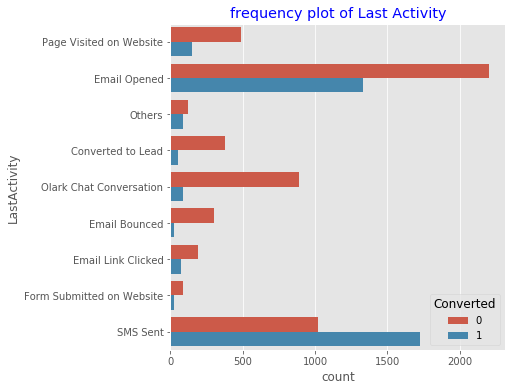

In [707]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='LastActivity',hue='Converted',data=leadscore_df);

In [708]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['LastActivity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

LastActivity,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Others,Page Visited on Website,SMS Sent
Converted,,,,,,,,,
0,87.38,92.02,72.66,62.32,75.86,91.37,59.02,76.5,37.09
1,12.62,7.98,27.34,37.68,24.14,8.63,40.98,23.5,62.91


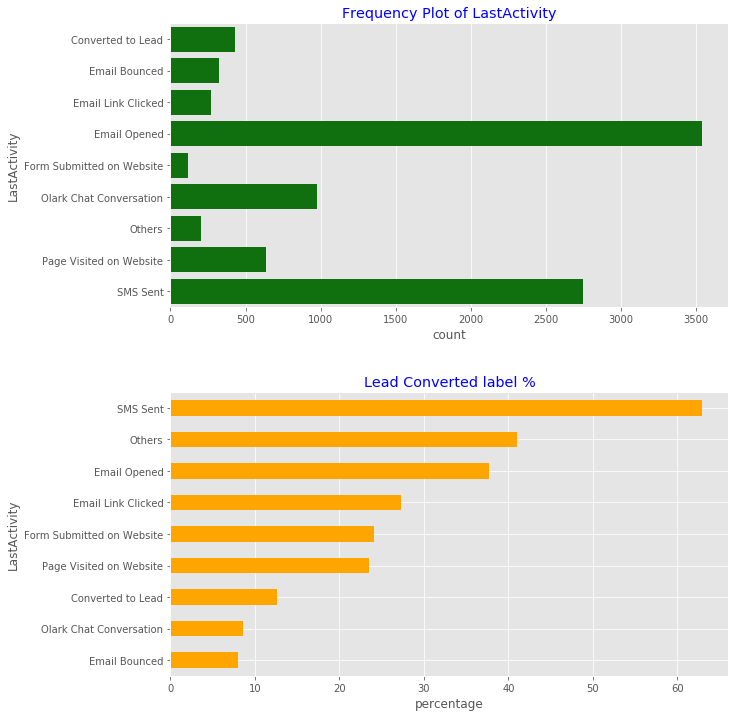

In [709]:
plot_frequency_and_percentage('LastActivity',crosstab_df,leadscore_df.sort_values(
    by='LastActivity',ascending=False),True,6)

### Observations from above plot
- Maximum leads have last activity as 'Email Opened'
- Leads with last activity as 'SMS Sent' have the highest lead conversion rate 

## 7.6 Lets plot Do not email<a id='EDA DndEmail'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [710]:
leadscore_df['DndEmail'].value_counts()

No     8504
Yes     730
Name: DndEmail, dtype: int64

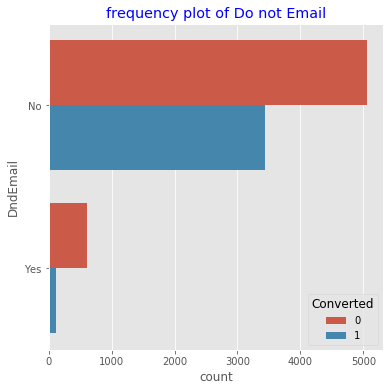

In [711]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of Do not Email',color='blue')
sns.countplot(y='DndEmail',hue='Converted',data=leadscore_df);

In [712]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['DndEmail']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

DndEmail,No,Yes
Converted,,
0,59.54,83.84
1,40.46,16.16


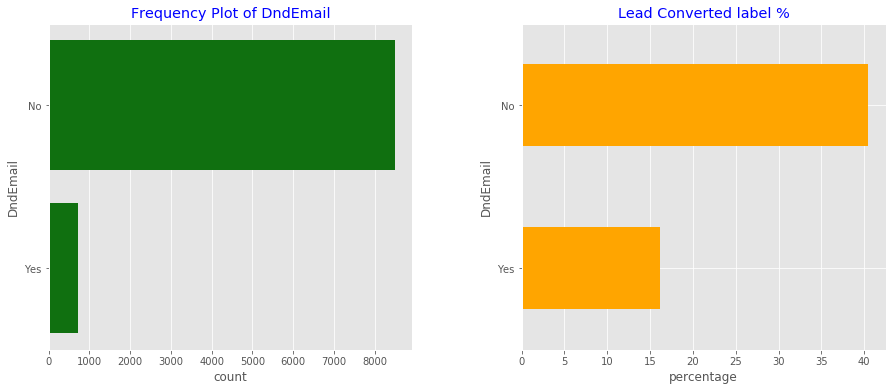

In [713]:
plot_frequency_and_percentage('DndEmail',crosstab_df,leadscore_df.sort_values(
    by='DndEmail',ascending=False),False,6)

### Observations from above plot
- Maximum number of leads and also the lead conversion rate is highest for the lead with Do not email option as No

## Lets check other categorical features

In [714]:
leadscore_df['DndCall'].value_counts()

No     9232
Yes       2
Name: DndCall, dtype: int64

In [715]:
leadscore_df['Search'].value_counts()

No     9220
Yes      14
Name: Search, dtype: int64

In [716]:
leadscore_df['PaperArticle'].value_counts()

No     9232
Yes       2
Name: PaperArticle, dtype: int64

In [717]:
leadscore_df['EducationForum'].value_counts()

No     9233
Yes       1
Name: EducationForum, dtype: int64

In [718]:
leadscore_df['Newspaper'].value_counts()

No     9233
Yes       1
Name: Newspaper, dtype: int64

In [719]:
leadscore_df['DigitalAd'].value_counts()

No     9230
Yes       4
Name: DigitalAd, dtype: int64

In [720]:
leadscore_df['Recommendation'].value_counts()

No     9227
Yes       7
Name: Recommendation, dtype: int64

In [721]:
leadscore_df['FreeCopy'].value_counts()

No     6349
Yes    2885
Name: FreeCopy, dtype: int64

## Observations from above categorical features
- Since there is very less variation in data values in the below features, so we can drop these features
    - DndCall
    - Search
    - PaperArticle
    - EducationForum
    - Newspaper
    - DigitalAd
    - Recommendation

In [722]:
print('number of columns before dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns=['DndCall','Search','PaperArticle','EducationForum','Newspaper',
                           'DigitalAd','Recommendation'],inplace=True)
print('number of columns after dropping column "Country" are: {0}'.format(leadscore_df.shape[1]))

number of columns before dropping column "Country" are: 20
number of columns after dropping column "Country" are: 13


## Lets plot feature - a free copy of Mastering The Interview

In [723]:
leadscore_df['FreeCopy'].value_counts()

No     6349
Yes    2885
Name: FreeCopy, dtype: int64

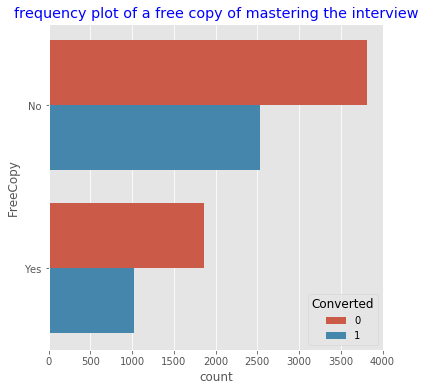

In [724]:
plt.figure(figsize=(6,6))
plt.title('frequency plot of a free copy of mastering the interview',color='blue')
sns.countplot(y='FreeCopy',hue='Converted',data=leadscore_df);

In [725]:
crosstab_df = pd.crosstab(leadscore_df['Converted'],
            leadscore_df['FreeCopy']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

FreeCopy,No,Yes
Converted,,
0,60.15,64.33
1,39.85,35.67


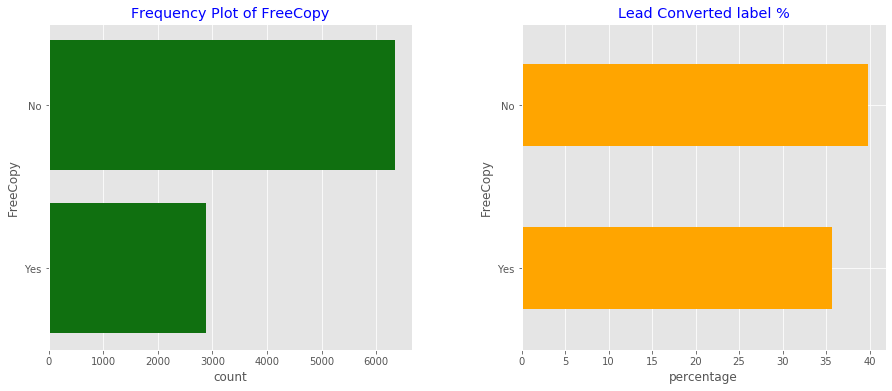

In [726]:
plot_frequency_and_percentage('FreeCopy',crosstab_df,leadscore_df.sort_values(
    by='FreeCopy',ascending=False),False,6)

### Observations from above plot
- Maximum number of leads and also the lead conversion rate is highest for the lead who do not opt for free copy of mastering the interview

In [727]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9234 entries, 0 to 9239
Data columns (total 13 columns):
Converted              9234 non-null int64
ProspectId             9234 non-null object
LeadNumber             9234 non-null int64
LeadOrigin             9234 non-null object
LeadSource             9234 non-null object
DndEmail               9234 non-null object
TotalVisits            9234 non-null float64
TotalWebsiteTime       9234 non-null int64
PagesPerVisit          9234 non-null float64
LastActivity           9234 non-null object
Occupation             9234 non-null object
FreeCopy               9234 non-null object
LastNotableActivity    9234 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


# 8. Data Preparation for modeling<a id='Data Preparation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 8.1 LeadNumber and ProspectId are case identifiers and dont add much value to modelling so will drop these columns<a id='Drop LeadNumber ProspectId'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [728]:
print('No. of columns before dropping 2 columns: {0}'.format(leadscore_df.shape[1]))
leadscore_df.drop(columns = ['ProspectId','LeadNumber'],inplace=True)
print('No. of columns after dropping 2 columns: {0}'.format(leadscore_df.shape[1]))

No. of columns before dropping 2 columns: 13
No. of columns after dropping 2 columns: 11


## 8.2 Lets do get_dummies for all the categorical columns<a id='Get dummies'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [729]:
leadscore_df.head()

,Converted,LeadOrigin,LeadSource,DndEmail,TotalVisits,TotalWebsiteTime,PagesPerVisit,LastActivity,Occupation,FreeCopy,LastNotableActivity
0,0,API,Olark Chat,No,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,0,API,Organic Search,No,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,1,Landing Page Submission,Direct Traffic,No,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0,Landing Page Submission,Direct Traffic,No,1.0,305,1.0,Others,Unemployed,No,Modified
4,1,Landing Page Submission,Google,No,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


### First make subset of dataframes based on datatype - object and numerical

In [730]:
object_cols = [col for col in leadscore_df.select_dtypes(include=np.object).columns]
numerical_cols = [col for col in leadscore_df.select_dtypes(include=np.number).columns]

print('Categorical Columns: \n{0}\n'.format(object_cols))
print('Numerical Columns: \n{0}'.format(numerical_cols))
            

Categorical Columns: 
['LeadOrigin', 'LeadSource', 'DndEmail', 'LastActivity', 'Occupation', 'FreeCopy', 'LastNotableActivity']

Numerical Columns: 
['Converted', 'TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']


In [731]:
## Remove Converted from Numerical Columns list
numerical_cols.remove('Converted')
numerical_cols

['TotalVisits', 'TotalWebsiteTime', 'PagesPerVisit']

### Apply get_dummies

In [732]:
#one hot encoding for categorical variables
leadscore_df = pd.get_dummies(data=leadscore_df,columns=object_cols,drop_first=True)
leadscore_df.sample(10)

,Converted,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
8040,0,7.0,653,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5729,1,5.0,698,5.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8326,1,2.0,1099,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6380,1,3.0,1636,2.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1141,1,0.0,0,0.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5075,0,2.0,1380,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3259,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2786,1,3.0,1010,2.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8770,0,2.0,126,1.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1779,1,6.0,99,6.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## 8.3 Check Correlation<a id='Check Correlation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

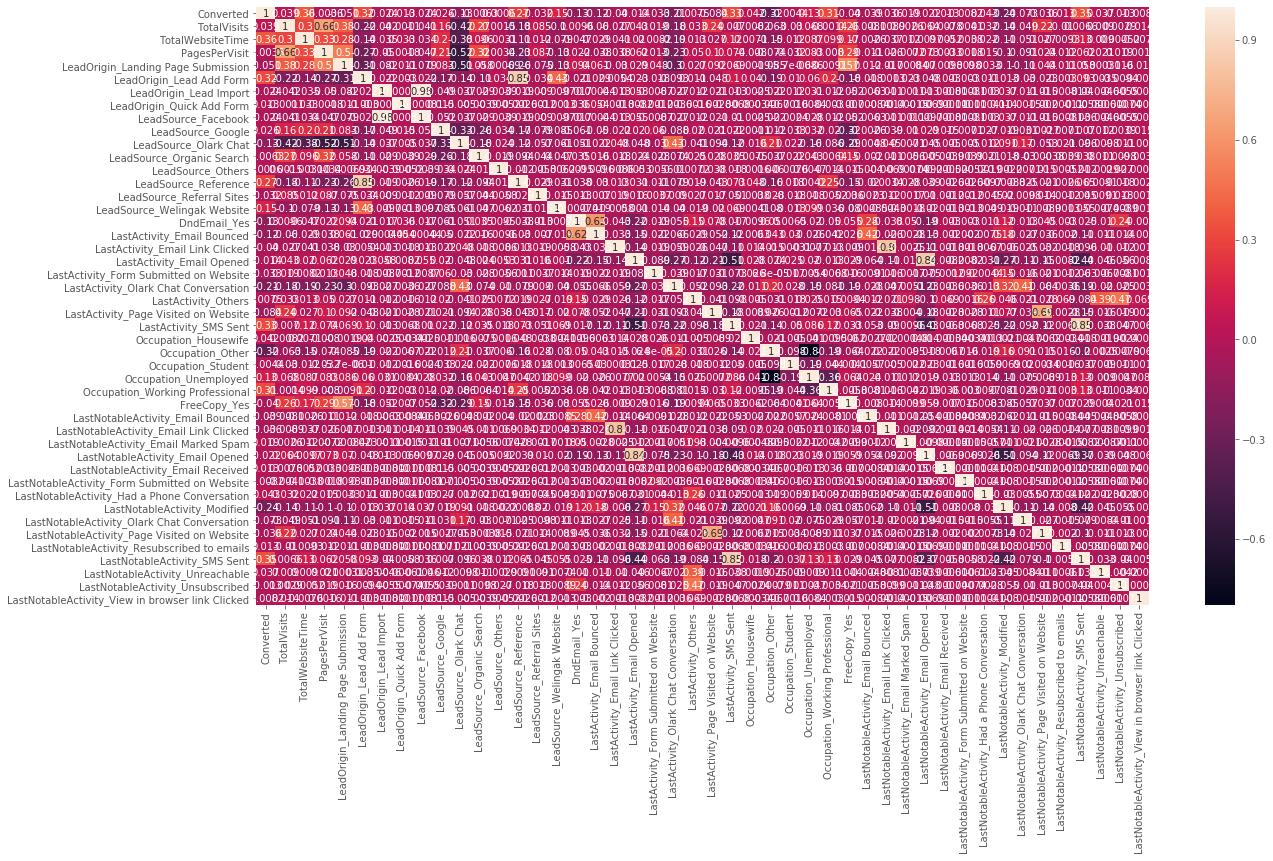

In [733]:
plt.figure(figsize=(20,11))
sns.heatmap(leadscore_df.corr(),annot=True);

In [734]:
leadscore_corr = leadscore_df.corr()
leadscore_corr.style.apply(lambda x: 
                           ["background: lightblue" if abs(v) > 0.5
                            else  
                            ("background: lightyellow" if abs(v) > 0.3 
                             else "" ) for v in x], axis = 1)
#leadscore_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)



,Converted,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
Converted,1,0.0386214,0.362653,-0.00363123,-0.0509281,0.32179,-0.0237076,0.0131416,-0.0237076,0.0262511,-0.129543,-0.00632281,0.000603807,0.270902,-0.032463,0.154193,-0.134714,-0.120147,-0.0397148,-0.0139121,-0.0333824,-0.210906,0.00753338,-0.083909,0.3257,0.0415776,-0.324278,-0.00438654,0.12895,0.313922,-0.0398214,-0.0391191,-0.0355759,0.018586,-0.0220111,0.0131416,-0.00824156,0.043487,-0.244604,-0.0726927,-0.0356318,0.0131416,0.35195,0.0366011,-0.0128667,-0.00824156
TotalVisits,0.0386214,1,0.300954,0.659709,0.382163,-0.220402,-0.0422229,-0.00109509,-0.0406192,0.156156,-0.415879,0.272787,0.00154963,-0.184661,0.0850131,-0.103152,0.00964264,-0.0597466,-0.0266259,0.0430394,0.0194303,-0.184012,0.0331392,0.238107,0.00695254,-0.00815431,-0.0625603,-0.0295024,0.0676072,-0.00136912,0.262393,-0.00812582,-0.00885175,0.00264395,0.0635004,0.00779855,-0.00405964,0.0315787,-0.136371,-0.0486057,0.221954,-0.00998873,0.00659495,0.0090182,0.00287778,0.0137276
TotalWebsiteTime,0.362653,0.300954,1,0.325858,0.276398,-0.139672,-0.0349221,0.0328451,-0.0339256,0.200087,-0.376827,0.0956581,-0.00314143,-0.107348,0.011918,-0.0785441,-0.046809,-0.0285121,-0.0413329,0.02015,0.00816739,-0.191668,0.013206,0.0273854,0.117422,0.00709752,-0.14842,-0.0124899,0.0867774,0.0993421,0.168731,-0.00261902,-0.037097,0.011682,0.00973413,0.00519279,-0.00380939,0.0222776,-0.10711,-0.0513901,0.0265856,-0.00926008,0.125254,0.00895717,0.000518693,-0.0075698
PagesPerVisit,-0.00363123,0.659709,0.325858,1,0.502731,-0.270392,-0.0499691,-0.00175547,-0.0472349,0.212171,-0.517372,0.317153,0.00344203,-0.226231,0.0872501,-0.12527,0.0221571,-0.0376554,-0.0381563,0.061917,0.0127662,-0.233478,0.0500436,0.103374,0.0735735,-0.00795273,-0.0739433,-0.032499,0.0825978,-0.00802193,0.286819,-0.0107349,-0.0256003,-0.00723654,0.073396,0.00329906,-0.00175547,0.0149211,-0.104894,-0.0905699,0.0238073,-0.0118645,0.0620006,0.0208507,0.0193477,0.00163107
LeadOrigin_Landing Page Submission,-0.0509281,0.382163,0.276398,0.502731,1,-0.307471,-0.0819679,-0.0110202,-0.0791485,0.0828181,-0.512952,0.0581049,-0.000685799,-0.262344,-0.0745357,-0.132335,0.0941746,0.0607522,-0.0299505,0.02891,0.0480806,-0.303352,0.0274453,0.0916894,0.0688352,-0.0018858,-0.0854829,-5.67342e-06,0.0856942,-0.00913131,0.569656,0.011569,-0.0167141,-0.00084299,0.0704536,0.00982808,0.00982808,0.00334407,-0.101556,-0.114769,0.0443162,-0.0110202,0.0577499,0.000314237,0.0157196,-0.0110202
LeadOrigin_Lead Add Form,0.32179,-0.220402,-0.139672,-0.270392,-0.307471,1,-0.0224765,-0.00302185,-0.0224765,-0.167319,-0.138595,-0.10968,0.0341697,0.853231,-0.0338763,0.430398,-0.0206261,-0.0292512,0.0054039,0.0230759,-0.0182268,-0.0930659,0.0111439,-0.048453,0.104903,0.0396219,-0.18596

### Observations from above correlation map
- TotalWebsiteTime, LeadOrigin_Lead Add Form, LastActivity_SMS Sent, Occupation_Working Professional, LastNotableActivity_SMS Sent features have positive correlation with target variable Converted
- There are many dummy variables that are correlated with each other

## 8.4 Divide into X and Y for model building<a id='Create X and y'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [735]:
X = leadscore_df.drop(columns = ['Converted'])
y = leadscore_df['Converted']

## 8.5 Train - Test Split<a id='train test split'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [736]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [737]:
X_train.head()

,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
7417,2.0,1601,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1032,6.0,1377,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6537,4.0,313,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7284,4.0,104,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3194,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## 8.6 Feature Scaling<a id='Feature Scaling'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Apply StandardScalar on all continuous numerical features

In [738]:
sc = StandardScaler()
#sc = MinMaxScaler()

#Create X_train_scaled, X_test_scaled
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Fit and transform Train
X_train_scaled[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

#Transform Test (No Fit)
X_test_scaled[numerical_cols] = sc.transform(X_test[numerical_cols])

In [739]:
X_train_scaled.head()

,TotalVisits,TotalWebsiteTime,PagesPerVisit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,FreeCopy_Yes,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
7417,-0.390363,2.031860,-0.167020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1032,0.763894,1.623276,1.774942,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6537,0.186765,-0.317501,0.803961,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7284,0.186765,-0.698725,-0.167020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3194,-0.967491,-0.888425,-1.138001,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [740]:
## get features list first and remove target column from features list
features = [col for col in leadscore_df if col!='Converted']
features

['TotalVisits',
 'TotalWebsiteTime',
 'PagesPerVisit',
 'LeadOrigin_Landing Page Submission',
 'LeadOrigin_Lead Add Form',
 'LeadOrigin_Lead Import',
 'LeadOrigin_Quick Add Form',
 'LeadSource_Facebook',
 'LeadSource_Google',
 'LeadSource_Olark Chat',
 'LeadSource_Organic Search',
 'LeadSource_Others',
 'LeadSource_Reference',
 'LeadSource_Referral Sites',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Form Submitted on Website',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'LastActivity_SMS Sent',
 'Occupation_Housewife',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'FreeCopy_Yes',
 'LastNotableActivity_Email Bounced',
 'LastNotableActivity_Email Link Clicked',
 'LastNotableActivity_Email Marked Spam',
 'LastNotableActivity_Email Opened',
 'LastNotabl

# 9. Data Modeling<a id='Data Modeling'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 9.1 First Logistic Regression Model using stats model with all features<a id='First Model without RFE'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [741]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        21:03:56   Pearson chi2:                 7.39e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.429e+15   2.75e+07   5.19e+07      0.000    1.43e+15    1.43e+15
TotalVisits                                      -4.268e+13    1.2e+06  -3.57e+07      0.000   -4.27e+13   -4.27e+13
TotalWebsiteTime                                  1.756e+14   9.48e+05   1.85e+08      0.000    1.76e+14    1.76e+14
PagesPerVisit                                     6.974e+13   1.32e+06   5.29e+07      0.000    6.97e+13    6.97e+13
LeadOrigin_Landing Page Submission               -3.474e+14   2.65e+06  -1.31e+08      0.000   -3.47e+14   -3.47e+14
LeadOrigin_Lead Add Form                          1.167e+15   1.26e+07   9.25e+07      0.000    1.17e+15    1.17e+15
LeadOrigin_Lead Import                            2.945e+15    4.8e+07   6.14e+07      0.000    2.94e+15    2.94e+15
LeadOrigin_Quick Add Form                           -5.0481   2.81e-07   -1.8e+07      0.000      -5.048      -5.048
LeadSource_Facebook                              -2.221e+15    4.8e+07  -4.63e+07      0.000   -2.22e+15   -2.22e+15
LeadSource_Google                                 3.966e+14    2.8e+06   1.42e+08      0.000    3.97e+14    3.97e+14
LeadSource_Olark Chat                            -3.457e+14   3.91e+06  -8.85e+07      0.000   -3.46e+14   -3.46e+14
LeadSource_Organic Search                          4.79e+13   3.17e+06   1.51e+07      0.000    4.79e+13    4.79e+13
LeadSource_Others                                -1.846e+14   1.55e+07  -1.19e+07      0.000   -1.85e+14   -1.85e+14
LeadSource_Reference                             -1.409e+14   1.32e+07  -1.07e+07      0.000   -1.41e+14   -1.41e+14
LeadSource_Referral Sites                        -1.976e+14   7.66e+06  -2.58e+07      0.000   -1.98e+14   -1.98e+14
LeadSource_Welingak Website                       8.367e+14   1.43e+07   5.87e+07      0.000    8.37e+14    8.37e+14
DndEmail_Yes                                     -2.382e+14   4.27e+06  -5.58e+07      0.000   -2.38e+14   -2.38e+14
LastActivity_Email Bounced                       -1.852e+14   7.36e+06  -2.52e+07      0.000   -1.85e+14   -1.85e+14
LastActivity_Email Link Clicked                   3.288e+14   9.54e+06   3.44e+07      0.000    3.29e+14    3.29e+14
LastActivity_Email Opened                         2.302e+14   5.09e+06   4.52e+07      0.000     2.3e+14     2.3e+14
LastActivity_Form Submitted on Website            1.965e+14   8.69e+06   2.26e+07      0.000    1.96e+14    1.96e+14
LastActivity_Olark Chat Conversation              4.986e+14   5.16e+06   9.67e+07      0.000    4.99e+14    4.99e+14
LastActivity_Others                               3.044e+14   9.13e+06   3.33e+07      0.000    3.04e+14    3.04e+14
LastActivity_Page Visited on Website     

### Observations from stats model for logistic regression
- Log-likelihood is nan. It could be due to presence of unimportant features or highly correlated features
- We will use RFE to select first 15 important features and will then check for accuracy of the model

## 9.2 Use RFE to get top 15 columns<a id='RFE'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [742]:
logreg = LogisticRegression()

In [743]:
# Use RFE for feature selection
rfe = RFE(logreg,15)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [744]:
#List all features with importance/ranking
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 21),
 ('TotalWebsiteTime', True, 1),
 ('PagesPerVisit', False, 22),
 ('LeadOrigin_Landing Page Submission', False, 10),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 26),
 ('LeadOrigin_Quick Add Form', False, 30),
 ('LeadSource_Facebook', False, 12),
 ('LeadSource_Google', False, 19),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 23),
 ('LeadSource_Others', False, 14),
 ('LeadSource_Reference', False, 13),
 ('LeadSource_Referral Sites', False, 24),
 ('LeadSource_Welingak Website', True, 1),
 ('DndEmail_Yes', True, 1),
 ('LastActivity_Email Bounced', False, 18),
 ('LastActivity_Email Link Clicked', False, 7),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', False, 4),
 ('LastActivity_Olark Chat Conversation', False, 17),
 ('LastActivity_Others', True, 1),
 ('LastActivity_Page Visited on Website', False, 6),
 ('LastActivity_SMS Sent', True, 1),
 ('Occupation_Housewife', F

### List of 15 important features filtered by RFE

In [745]:
rfe_col = list(X_train_scaled.columns[rfe.support_])
rfe_col

['TotalWebsiteTime',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LeadSource_Welingak Website',
 'DndEmail_Yes',
 'LastActivity_Email Opened',
 'LastActivity_Others',
 'LastActivity_SMS Sent',
 'Occupation_Other',
 'Occupation_Working Professional',
 'LastNotableActivity_Had a Phone Conversation',
 'LastNotableActivity_Modified',
 'LastNotableActivity_Olark Chat Conversation',
 'LastNotableActivity_Unreachable',
 'LastNotableActivity_Unsubscribed']

### Create X_train with RFE selected features

In [746]:
X_train_scaled_rfe = X_train_scaled[rfe_col]
X_train_scaled_rfe.head()

,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
7417,2.031860,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1032,1.623276,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6537,-0.317501,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7284,-0.698725,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3194,-0.888425,1,0,0,0,1,0,0,0,0,0,0,0,0,0


### Create X_test with RFE selected features

In [747]:
X_test_scaled_rfe = X_test_scaled[rfe_col]
X_test_scaled_rfe.head()

,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4871,1.907826,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1949,-0.888425,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5628,1.429927,0,0,0,0,0,0,1,1,0,0,1,0,0,0
8666,-0.846472,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1025,0.838939,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 9.3 Functions to use RFE on fetures, build model and check VIF<a id='Common Functions'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [748]:
def check_rfe(X_df,y_df,col_list):
    logreg_model1 = LogisticRegression()
    logreg_model1.fit(X_df[col_list],y_df)
    # Use RFE for feature selection
    rfe1 = RFE(logreg_model1,15)
    rfe1.fit(X_train_scaled[col_list],y_df)
    #List all features with importance/ranking
    print(list(zip(col_list,rfe1.support_,rfe1.ranking_)))

In [749]:
def build_statsmodel(X_df,y_df):
    #add constant. Its because intercept might not pass through origin
    #By default its not added in stats model
    #we have to add constant explicitly
    X_train_sm = sm.add_constant(X_df)
    lr = sm.GLM(y_df,X_train_sm, family = sm.families.Binomial()).fit()
    
    ## Print the params obtained
    print('************ feature - coefficients *****************')
    print(round(lr.params,4))
    print('*****************************************************')
    print()
    print()
    ## Print stats model summary
    print(lr.summary())
    return lr,X_train_sm

In [750]:
def check_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [751]:
def createfinaldf_and_checkscores(y_df,y_pred_df):
    y_pred_final_df = pd.DataFrame({'Converted':y_df.values, 'Converted_Prob':y_pred_df})
    y_pred_final_df['LeadId'] = y_df.index
    
    
    # Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
    ## this means cut-off set is 0.5
    y_pred_final_df['predicted'] = y_pred_final_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #print(y_train_pred_final.head())
    
    #Confusion matrix
    cm = confusion_matrix(y_pred_final_df['Converted'],y_pred_final_df['predicted'])
    #print(conf_matrix)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['unsuccessfull', 'successfull']); ax.yaxis.set_ticklabels(['unsuccessfull', 'successfull']);
    plt.show();
    
    # Let's check the overall accuracy.
    print('Accuracy score: {0}'.format
          (accuracy_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Let's check sensitivity
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    print('Sensitivity score: {0}'.format(sensitivity))
    # Lets check f1-score
    print('f1-score: {0}'.format
          (f1_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check precision score
    print('Precision score: {0}'.format
          (precision_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    # Lets check Recall Score
    print('Recall score: {0}'.format
          (recall_score(y_pred_final_df['Converted'],y_pred_final_df['predicted'])))
    
    return y_pred_final_df, cm
    

## 9.4 Build stats model using RFE selected features<a id='Stats with RFE'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [752]:
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train)

************ feature - coefficients *****************
const                                          -1.3775
TotalWebsiteTime                                1.1260
LeadOrigin_Lead Add Form                        3.4668
LeadSource_Olark Chat                           1.2734
LeadSource_Welingak Website                     2.7337
DndEmail_Yes                                   -1.4522
LastActivity_Email Opened                       0.5113
LastActivity_Others                             0.7213
LastActivity_SMS Sent                           1.6239
Occupation_Other                               -1.0928
Occupation_Working Professional                 2.4069
LastNotableActivity_Had a Phone Conversation    3.1235
LastNotableActivity_Modified                   -0.7430
LastNotableActivity_Olark Chat Conversation    -1.0782
LastNotableActivity_Unreachable                 1.5936
LastNotableActivity_Unsubscribed                1.4706
dtype: float64
***************************************************

### Checking VIF

In [753]:
check_vif(X_train_sm)

,Features,VIF
0,const,8.91
6,LastActivity_Email Opened,2.13
8,LastActivity_SMS Sent,2.02
7,LastActivity_Others,1.92
12,LastNotableActivity_Modified,1.51
15,LastNotableActivity_Unsubscribed,1.48
2,LeadOrigin_Lead Add Form,1.41
14,LastNotableActivity_Unreachable,1.31
3,LeadSource_Olark Chat,1.28
1,TotalWebsiteTime,1.26


### From above table
- Since all variables have p-value<0.05 and low VIF as well, so we need not drop any feature

In [754]:
y_train_pred = lr.predict(X_train_sm).values.reshape(-1)

In [755]:
y_train_pred[:10]

array([0.92651679, 0.88837938, 0.47225438, 0.16070783, 0.83204449,
       0.05674729, 0.16718224, 0.4027771 , 0.06262168, 0.03621737])

## 9.5 When cutoff is 0.5<a id='Cutoff 0.5'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

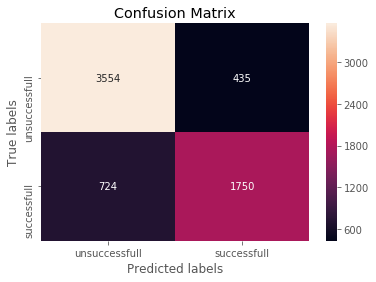

Accuracy score: 0.8206715147764196
Sensitivity score: 0.7073565076798707
f1-score: 0.7512341704228375
Precision score: 0.8009153318077803
Recall score: 0.7073565076798707


In [756]:
y_train_pred_final, conf_matrix = createfinaldf_and_checkscores(y_train,y_train_pred)

### Metrics beyond accuracy

In [757]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

### Sensitivity of final logistic regression model

In [758]:
TP / float(TP+FN)

0.7073565076798707

### Specificity of final logistic regression model

In [759]:
TN / float(TN + FP)

0.8909501128102282

## Observations from above classification report
- Accuracy is 82%, precision is 80% and recall is 71%
- This is when cutoff set is 0.5
- We will plot the ROC Curve in next steps and will also try to adjust cutoff to get better precision score

## Lets create data frame to store cutoff and train-test metrics

In [760]:
result_metrics = pd.DataFrame(columns=['cutoff','train_acc','train_sen','train_spec','train_prec',
                                      'test_acc','test_sen','test_spec','test_prec'])

## Plotting ROC Curve

In [761]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [762]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final['Converted'], 
                                         y_train_pred_final['Converted_Prob'], drop_intermediate = False )

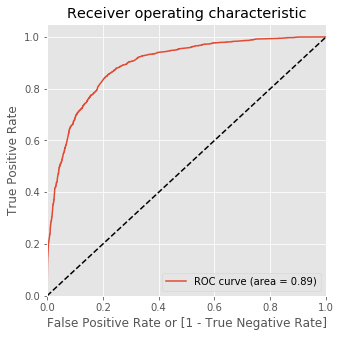

In [763]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])

## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
- We will try with various cutoff points and try to check which cutoff point gives more stable accuracy, sensitivity and precision score of train and test data
- <b><font color=blue>We will use various cutoff points as - [0.35,0.36,0.38,0.4,0.41] and will compare the metrics</font></b>

In [764]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0
2,0,0.472254,6537,0,1,1,1,1,1,0,0,0,0,0
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0


In [765]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382794  1.000000  0.000000
0.1   0.1  0.637011  0.972514  0.428930
0.2   0.2  0.767291  0.921584  0.671597
0.3   0.3  0.803652  0.867017  0.764352
0.4   0.4  0.816958  0.774454  0.843319
0.5   0.5  0.820672  0.707357  0.890950
0.6   0.6  0.814173  0.644301  0.919529
0.7   0.7  0.788179  0.536378  0.944347
0.8   0.8  0.763423  0.436136  0.966408
0.9   0.9  0.715457  0.278092  0.986713


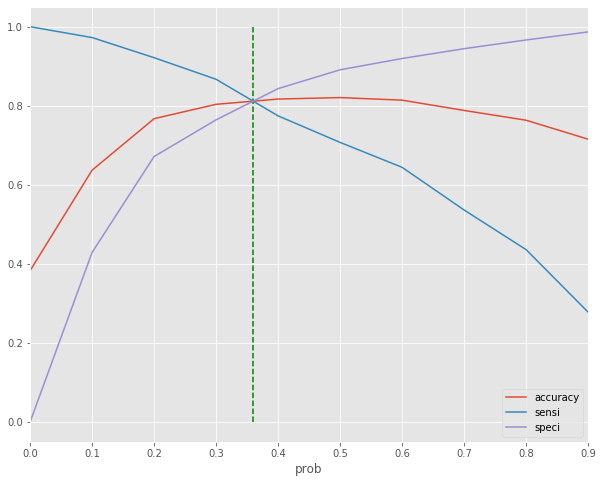

In [766]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,8))
plt.vlines(x=0.36, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

## Observations from above plot
- Cutoff at 0.36 gives a good accuracy, sensitivity and specificity scores 
- Also, the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
- So we will choose cut-off as 0.36 and generate lead scores

## 9.6 With 0.36 as cut-off point lets check train and test scores<a id='Cutoff 0.36'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [767]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0


In [768]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.813863530868018

In [769]:
confusion_train = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion_train

array([[3262,  727],
       [ 476, 1998]])

In [770]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [771]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8075990299110751

In [772]:
# Let us calculate specificity
TN / (TN+FP)

0.8177488092253697

## Precision and Recall

In [773]:
#Lets calculate Precision
TP / (TP + FP)

0.7332110091743119

In [774]:
# Lets calculate recall
TP / (TP + FN)

0.8075990299110751

In [775]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7332110091743119

In [776]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8075990299110751

##### F1-Score

In [777]:
f1_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])

0.7686093479515291

In [778]:
train_acc = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[0,'cutoff']=0.36
result_metrics.loc[0,'train_acc'] = round(train_acc,2)
result_metrics.loc[0,'train_sen'] = round(train_sen,2)
result_metrics.loc[0,'train_spec'] = round(train_spec,2)
result_metrics.loc[0,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.36, we have train accuracy of 81.4%, Sensitivity of 81% and Precision of 73%

### Precision and recall tradeoff

In [779]:
y_train_pred_final['Converted'], y_train_pred_final['predicted']

(0       0
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      1
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      0
 25      0
 26      0
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      1
 39      0
 40      0
 41      0
 42      1
 43      0
 44      1
 45      1
 46      0
 47      1
 48      0
 49      0
 50      0
 51      1
 52      0
 53      1
 54      0
 55      0
 56      0
 57      0
 58      1
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      0
 66      0
 67      0
 68      1
 69      1
 70      1
 71      1
 72      0
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      0
 87      0
 88      0
 89      0
 90      1

In [780]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], 
                                          y_train_pred_final['Converted_Prob'])

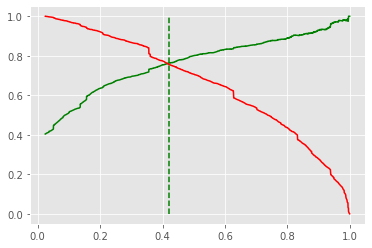

In [781]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

### Making predictions on the test set

In [782]:
X_train_sm.drop(columns=['const'],inplace=True)
rfe_col = list(X_train_sm.columns)
print('final list of columns: \n{0}'.format(rfe_col))

final list of columns: 
['TotalWebsiteTime', 'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat', 'LeadSource_Welingak Website', 'DndEmail_Yes', 'LastActivity_Email Opened', 'LastActivity_Others', 'LastActivity_SMS Sent', 'Occupation_Other', 'Occupation_Working Professional', 'LastNotableActivity_Had a Phone Conversation', 'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_Unreachable', 'LastNotableActivity_Unsubscribed']


In [783]:
#add constant to X_test_scaled
X_test_sm = sm.add_constant(X_test_scaled_rfe[rfe_col])
X_test_sm.head()

,const,TotalWebsiteTime,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,DndEmail_Yes,LastActivity_Email Opened,LastActivity_Others,LastActivity_SMS Sent,Occupation_Other,Occupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4871,1.0,1.907826,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1949,1.0,-0.888425,0,1,0,0,0,0,1,1,0,0,1,0,0,0
5628,1.0,1.429927,0,0,0,0,0,0,1,1,0,0,1,0,0,0
8666,1.0,-0.846472,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1025,1.0,0.838939,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Making predictions on the test set

In [784]:
y_test_pred = lr.predict(X_test_sm)

In [785]:
y_test_pred[:10]

4871    0.782808
1949    0.211415
5628    0.505193
8666    0.025206
1025    0.180797
2427    0.868888
5867    0.248897
6557    0.846667
2854    0.971077
6177    0.827058
dtype: float64

In [786]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [787]:
# Let's see the head
y_pred_1.head()

,0
4871,0.782808
1949,0.211415
5628,0.505193
8666,0.025206
1025,0.180797


In [788]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [789]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [790]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [791]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [792]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4871,0.782808
1,1,1949,0.211415
2,0,5628,0.505193
3,0,8666,0.025206
4,1,1025,0.180797


In [793]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [794]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadId','Converted','Converted_Prob'], axis=1)

In [795]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4871,0,0.782808
1,1949,1,0.211415
2,5628,0,0.505193
3,8666,0,0.025206
4,1025,1,0.180797


### Using cutoff as 0.36 and apply on test data and check if lead will convert or not

In [796]:
y_pred_final['predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.36 else 0)

In [797]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,predicted
0,4871,0,0.782808,1
1,1949,1,0.211415,0
2,5628,0,0.505193,1
3,8666,0,0.025206,0
4,1025,1,0.180797,0


In [798]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.8137856369541682

In [799]:
# Let's check the f1-score.
f1_score(y_pred_final['Converted'], y_pred_final['predicted'])

0.7710736468500443

In [800]:
confusion_test = confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted'])
confusion_test

array([[1386,  300],
       [ 216,  869]])

In [801]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [802]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009216589861751

In [803]:
# Let us calculate specificity
TN / float(TN+FP)

0.8220640569395018

In [804]:
# Lets calculate Precision
TP / (TP + FP)

0.7433704020530368

In [805]:
# Lets calcualte Recall
TP / (TP + FN)

0.8009216589861751

In [806]:
test_acc = accuracy_score(y_pred_final['Converted'], y_pred_final['predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[0,'test_acc'] = round(test_acc,2)
result_metrics.loc[0,'test_sen'] = round(test_sen,2)
result_metrics.loc[0,'test_spec'] = round(test_spec,2)
result_metrics.loc[0,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.36, we have test accuracy of 81.4%, Sensivity of 80.1% and Precision of 74.3%

In [807]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74


# Lets check for optimal cut-off point

## 9.7 With 0.35 as cut-off point lets check metrics<a id='Cutoff 0.35'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [808]:
cutoff1_train = y_train_pred_final.copy()

In [809]:
cutoff1_train['final_predicted'] = cutoff1_train['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)

cutoff1_train.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


In [810]:
# Let's check the overall accuracy.
accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])

0.8116973541698902

In [811]:
confusion_train1 = confusion_matrix(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
confusion_train1

array([[3158,  831],
       [ 386, 2088]])

In [812]:
TP = confusion_train1[1,1] # true positive 
TN = confusion_train1[0,0] # true negatives
FP = confusion_train1[0,1] # false positives
FN = confusion_train1[1,0] # false negatives

In [813]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8439773645917542

In [814]:
# Let us calculate specificity
TN / (TN+FP)

0.7916771120581599

## Precision and Recall

In [815]:
# Lets calculate Precision
TP / (TP + FP)

0.7153134635149023

In [816]:
# Lets calculate recall
TP / (TP + FN)

0.8439773645917542

##### F1-Score

In [817]:
f1_score(cutoff1_train['Converted'],cutoff1_train['final_predicted'])

0.7743371036528833

In [818]:
train_acc = accuracy_score(cutoff1_train['Converted'], cutoff1_train['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[1,'cutoff']=0.35
result_metrics.loc[1,'train_acc'] = round(train_acc,2)
result_metrics.loc[1,'train_sen'] = round(train_sen,2)
result_metrics.loc[1,'train_spec'] = round(train_spec,2)
result_metrics.loc[1,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.49, we have train accuracy of 81.2%, Sensitivity of 84.4% and Precision of 71.5%

### Making predictions on the test set

In [819]:
cutoff1_test = y_pred_final.copy()

In [820]:
cutoff1_test['final_predicted'] = cutoff1_test['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [821]:
cutoff1_test.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted
0,4871,0,0.782808,1,1
1,1949,1,0.211415,0,0
2,5628,0,0.505193,1,1
3,8666,0,0.025206,0,0
4,1025,1,0.180797,0,0


In [822]:
# Let's check the overall accuracy.
accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.8080115481775533

In [823]:
# Let's check the f1-score.
f1_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])

0.7722602739726027

In [824]:
confusion_test1 = confusion_matrix(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
confusion_test1

array([[1337,  349],
       [ 183,  902]])

In [825]:
TP = confusion_test1[1,1] # true positive 
TN = confusion_test1[0,0] # true negatives
FP = confusion_test1[0,1] # false positives
FN = confusion_test1[1,0] # false negatives

In [826]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8313364055299539

In [827]:
# Let us calculate specificity
TN / float(TN+FP)

0.7930011862396203

In [828]:
# Lets calculate precision
TP/ float(TP+FP)

0.7210231814548361

In [829]:
# Lets calculate recall
TP / float(TP + FN)

0.8313364055299539

In [830]:
test_acc = accuracy_score(cutoff1_test['Converted'], cutoff1_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[1,'test_acc'] = round(test_acc,2)
result_metrics.loc[1,'test_sen'] = round(test_sen,2)
result_metrics.loc[1,'test_spec'] = round(test_spec,2)
result_metrics.loc[1,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.35, we have test accuracy of 80.8%, Sensivity of 83.13% and Precision of 80.3%

## 9.8 Lets take the cutoff as 0.37 and check for the accuracy, specificty and precision<a id='Cutoff 0.37'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [831]:
y_train_2 = y_train_pred_final.copy()

In [832]:
y_train_2['final_predicted'] = y_train_2['Converted_Prob'].map( lambda x: 1 if x > 0.37 else 0)

y_train_2.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


### Accuracy

In [833]:
# Let's check the overall accuracy.
accuracy_score(y_train_2['Converted'], y_train_2['final_predicted'])

0.8121615348909176

In [834]:
confusion2 = confusion_matrix(y_train_2['Converted'], y_train_2['final_predicted'])
confusion2

array([[3292,  697],
       [ 517, 1957]])

In [835]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity and Specificity

In [836]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7910266774454325

In [837]:
# Let us calculate specificity
TN / float(TN+FP)

0.8252694911005265

### Precision and Recall

In [838]:
# Lets calculate Precision
TP/ float(TP+FP)

0.7373775433308214

In [839]:
# Lets call recall
TP / float(TP + FN)

0.7910266774454325

##### F1-Score

In [840]:
f1_score(y_train_2['Converted'],y_train_2['final_predicted'])

0.763260530421217

In [841]:
train_acc = accuracy_score(y_train_2['Converted'], y_train_2['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[2,'cutoff']=0.37
result_metrics.loc[2,'train_acc'] = round(train_acc,2)
result_metrics.loc[2,'train_sen'] = round(train_sen,2)
result_metrics.loc[2,'train_spec'] = round(train_spec,2)
result_metrics.loc[2,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.51, we have train accuracy of 81.2%, Sensitivity of 79.1% and Precision of 73.7%

### Making predictions on the test set

In [842]:
cutoff2_test = y_pred_final.copy()

In [843]:
cutoff2_test['final_predicted'] = cutoff2_test['Converted_Prob'].map(lambda x: 1 if x > 0.37 else 0)

In [844]:
cutoff2_test.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted
0,4871,0,0.782808,1,1
1,1949,1,0.211415,0,0
2,5628,0,0.505193,1,1
3,8666,0,0.025206,0,0
4,1025,1,0.180797,0,0


In [845]:
# Let's check the overall accuracy.
accuracy_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])

0.8123421147600144

In [846]:
# Let's check the f1-score.
f1_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])

0.7670250896057348

In [847]:
confusion_test2 = confusion_matrix(cutoff2_test['Converted'], cutoff2_test['final_predicted'])
confusion_test2

array([[1395,  291],
       [ 229,  856]])

In [848]:
TP = confusion_test2[1,1] # true positive 
TN = confusion_test2[0,0] # true negatives
FP = confusion_test2[0,1] # false positives
FN = confusion_test2[1,0] # false negatives

In [849]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889400921658987

In [850]:
# Let us calculate specificity
TN / float(TN+FP)

0.8274021352313167

In [851]:
# Lets calculate precision
TP/ float(TP+FP)

0.7462946817785527

In [852]:
# Lets calculate recall
TP / float(TP + FN)

0.7889400921658987

In [853]:
test_acc = accuracy_score(cutoff2_test['Converted'], cutoff2_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[2,'test_acc'] = round(test_acc,2)
result_metrics.loc[2,'test_sen'] = round(test_sen,2)
result_metrics.loc[2,'test_spec'] = round(test_spec,2)
result_metrics.loc[2,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.37, we have test accuracy of 81.2%, Sensitivity of 78.9% and Precision of 74.6% 

In [854]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74
1,0.35,0.81,0.84,0.79,0.72,0.81,0.83,0.79,0.72
2,0.37,0.81,0.79,0.83,0.74,0.81,0.79,0.83,0.75


## Observations from above result metrics
- Train and test accuracy, sensitivity and precision scores are almost similar for cutoff at 0.35
- So <b><font size=3 color=blue>we will choose cutoff as 0.35 and will generate the lead score</font></b>

## 9.9 Lead Score on Train Data<a id='Lead Score Train data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [855]:
y_train_score_final = cutoff1_train.copy()
y_train_score_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


In [856]:
y_train_score_final['Lead_Score'] = y_train_score_final['Converted_Prob'] * 100
y_train_score_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1,92.651679
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1,88.837938
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1,47.225438
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0,16.070783
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1,83.204449


## 9.10 Lead Score on Test Data<a id='Lead Score Test data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [857]:
y_test_score_final = cutoff1_test.copy()
y_test_score_final.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted
0,4871,0,0.782808,1,1
1,1949,1,0.211415,0,0
2,5628,0,0.505193,1,1
3,8666,0,0.025206,0,0
4,1025,1,0.180797,0,0


In [858]:
y_test_score_final['Lead_Score'] = y_test_score_final['Converted_Prob'] * 100
y_test_score_final.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted,Lead_Score
0,4871,0,0.782808,1,1,78.280807
1,1949,1,0.211415,0,0,21.141528
2,5628,0,0.505193,1,1,50.519282
3,8666,0,0.025206,0,0,2.520601
4,1025,1,0.180797,0,0,18.079728


## 9.11 Lets Combine Train and Test Data to get the lead score on complete data set<a id='Lead Score Combined data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [859]:
print('shape of train data set: {0}'.format(y_train_score_final.shape))
print('shape of test data set: {0}'.format(y_test_score_final.shape))

shape of train data set: (6463, 16)
shape of test data set: (2771, 6)


In [860]:
## Lets keep only relevant columns in train data set
y_train_score_final = y_train_score_final[['LeadId','Converted',
                                           'Converted_Prob','predicted','final_predicted','Lead_Score']]
y_train_score_final.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted,Lead_Score
0,7417,0,0.926517,1,1,92.651679
1,1032,1,0.888379,1,1,88.837938
2,6537,0,0.472254,1,1,47.225438
3,7284,0,0.160708,0,0,16.070783
4,3194,1,0.832044,1,1,83.204449


In [861]:
lead_score_combined = pd.concat([y_train_score_final,y_test_score_final],axis=0,join='outer')
print('shape of combined dataset: {0}'.format(lead_score_combined.shape))
lead_score_combined.head()

shape of combined dataset: (9234, 6)


,LeadId,Converted,Converted_Prob,predicted,final_predicted,Lead_Score
0,7417,0,0.926517,1,1,92.651679
1,1032,1,0.888379,1,1,88.837938
2,6537,0,0.472254,1,1,47.225438
3,7284,0,0.160708,0,0,16.070783
4,3194,1,0.832044,1,1,83.204449


# 10. Subjective Questions<a id='Subjective Questions'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### 1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

### 2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?


## Lets plot features and respective coefficients from stats regression model

In [862]:
params_df = pd.DataFrame(columns=['coefficient'],data=lr.params).reset_index()
params_df.rename(columns={'index':'feature'},inplace=True)
params_df.drop(index=0,inplace=True)
params_df.sort_values(by='coefficient',ascending=False)

,feature,coefficient
2,LeadOrigin_Lead Add Form,3.466767
11,LastNotableActivity_Had a Phone Conversation,3.123466
4,LeadSource_Welingak Website,2.733684
10,Occupation_Working Professional,2.406889
8,LastActivity_SMS Sent,1.623893
14,LastNotableActivity_Unreachable,1.593580
15,LastNotableActivity_Unsubscribed,1.470591
3,LeadSource_Olark Chat,1.273367
1,TotalWebsiteTime,1.126039
7,LastActivity_Others,0.721333


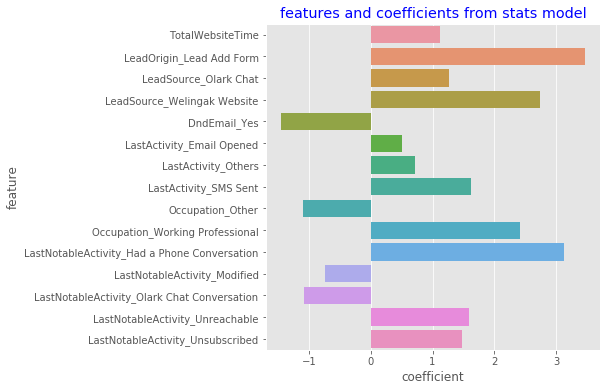

In [863]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from stats model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

### Observations from above plot we conclude that
- <b><font size=3 color=blue>Ans 1: Top three predictors that contribute in lead conversion are Lead Origin, Last Notable Activity and Lead Source
- Ans 2: Top three categorical/dummy variables are LeadOrigin_Lead Add Form, LastNotableActivity_Had a Phone Conversation and LeadSource_Welingak Website</font></b>

### 3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage

Ans 3: Since the company wants to focus on lead conversion aggressively, this means that company is focusing more on True Positive. 
<b><font size=3 color=blue>For this, we should choose the cutoff such that the sensitivity of the model should increase without compromising much on accuracy of model</font></b>

### From original model we have

In [864]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382794  1.000000  0.000000
0.1   0.1  0.637011  0.972514  0.428930
0.2   0.2  0.767291  0.921584  0.671597
0.3   0.3  0.803652  0.867017  0.764352
0.4   0.4  0.816958  0.774454  0.843319
0.5   0.5  0.820672  0.707357  0.890950
0.6   0.6  0.814173  0.644301  0.919529
0.7   0.7  0.788179  0.536378  0.944347
0.8   0.8  0.763423  0.436136  0.966408
0.9   0.9  0.715457  0.278092  0.986713


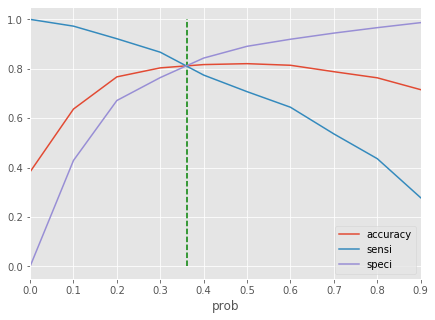

In [865]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(7,5))
plt.vlines(x=0.361, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

### Observations from above plot
- for cutoff 0.3, we have good Sensitivity score without compromising much on accuracy score
- Therefore we will choose cutoff as 0.3

In [866]:
y_train_8 = y_train_pred_final.copy()

In [867]:
y_train_8['final_predicted'] = y_train_8['Converted_Prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_8.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,1
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


### Accuracy

In [868]:
# Let's check the overall accuracy.
accuracy_score(y_train_8['Converted'], y_train_8['final_predicted'])

0.8036515550054154

In [869]:
confusion8 = confusion_matrix(y_train_8['Converted'], y_train_8['final_predicted'])
confusion8

array([[3049,  940],
       [ 329, 2145]])

In [870]:
TP = confusion8[1,1] # true positive 
TN = confusion8[0,0] # true negatives
FP = confusion8[0,1] # false positives
FN = confusion8[1,0] # false negatives

### Sensitivity and Specificity

In [871]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8670169765561844

In [872]:
# Let us calculate specificity
TN / float(TN+FP)

0.7643519679117573

### Precision and Recall

In [873]:
# Lets calculate Precision
TP/ float(TP+FP)

0.6952998379254457

In [874]:
# Lets call recall
TP / float(TP + FN)

0.8670169765561844

##### F1-Score

In [875]:
f1_score(y_train_8['Converted'],y_train_8['final_predicted'])

0.7717215326497572

In [876]:
train_acc = accuracy_score(y_train_8['Converted'], y_train_8['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[3,'cutoff']=0.3
result_metrics.loc[3,'train_acc'] = round(train_acc,2)
result_metrics.loc[3,'train_sen'] = round(train_sen,2)
result_metrics.loc[3,'train_spec'] = round(train_spec,2)
result_metrics.loc[3,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.3, we have train accuracy of 80.4%, sensitivity of 86.7% and specificity of 76.44%

### Making predictions on the test set

In [877]:
cutoff8_test = y_pred_final.copy()

In [878]:
cutoff8_test['final_predicted'] = cutoff8_test['Converted_Prob'].map(lambda x: 1 if x > 0.3 else 0)

In [879]:
cutoff8_test.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted
0,4871,0,0.782808,1,1
1,1949,1,0.211415,0,0
2,5628,0,0.505193,1,1
3,8666,0,0.025206,0,0
4,1025,1,0.180797,0,0


In [880]:
# Let's check the overall accuracy.
accuracy_score(cutoff8_test['Converted'], cutoff8_test['final_predicted'])

0.7997112955611693

In [881]:
# Let's check the f1-score.
f1_score(cutoff8_test['Converted'], cutoff8_test['final_predicted'])

0.7711340206185567

In [882]:
confusion_test8 = confusion_matrix(cutoff8_test['Converted'], cutoff8_test['final_predicted'])
confusion_test8

array([[1281,  405],
       [ 150,  935]])

In [883]:
TP = confusion_test8[1,1] # true positive 
TN = confusion_test8[0,0] # true negatives
FP = confusion_test8[0,1] # false positives
FN = confusion_test8[1,0] # false negatives

In [884]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8617511520737328

In [885]:
# Let us calculate specificity
TN / float(TN+FP)

0.7597864768683275

In [886]:
# Lets calculate precision
TP/ float(TP+FP)

0.6977611940298507

In [887]:
# Lets calculate recall
TP / float(TP + FN)

0.8617511520737328

In [888]:
test_acc = accuracy_score(cutoff8_test['Converted'], cutoff8_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[3,'test_acc'] = round(test_acc,2)
result_metrics.loc[3,'test_sen'] = round(test_sen,2)
result_metrics.loc[3,'test_spec'] = round(test_spec,2)
result_metrics.loc[3,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.3, we have test accuracy of 80%, sensitivity of 86.2% and specificity of 76%

In [889]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74
1,0.35,0.81,0.84,0.79,0.72,0.81,0.83,0.79,0.72
2,0.37,0.81,0.79,0.83,0.74,0.81,0.79,0.83,0.75
3,0.3,0.8,0.87,0.76,0.7,0.8,0.86,0.76,0.7


### 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

Ans 4: 
- Since the company wants to to avoid unnecessary phone call, this means that company is focusing on less number of false positive rate. 
- Since FPR = 1 - Specificity, this means <b><font size=3 color=blue>we must set a cutoff such that the Specificity is high from the model thereby resulting in less False Positive Rate</font></b>

### From original model we have

In [890]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382794  1.000000  0.000000
0.1   0.1  0.637011  0.972514  0.428930
0.2   0.2  0.767291  0.921584  0.671597
0.3   0.3  0.803652  0.867017  0.764352
0.4   0.4  0.816958  0.774454  0.843319
0.5   0.5  0.820672  0.707357  0.890950
0.6   0.6  0.814173  0.644301  0.919529
0.7   0.7  0.788179  0.536378  0.944347
0.8   0.8  0.763423  0.436136  0.966408
0.9   0.9  0.715457  0.278092  0.986713


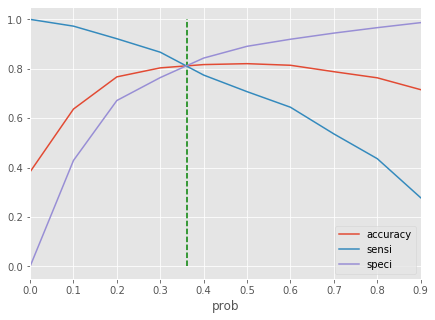

In [891]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(7,5))
plt.vlines(x=0.361, ymax=1, ymin=0, colors="g", linestyles="--")
plt.show()

### Observations from above cells
- for cutoff 0.6, we have good Specificity score without compromising much on accuracy score
- Therefor we will choose cutoff as 0.6

In [892]:
y_train_9 = y_train_pred_final.copy()

In [893]:
y_train_9['final_predicted'] = y_train_9['Converted_Prob'].map( lambda x: 1 if x > 0.6 else 0)

y_train_9.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.926517,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888379,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.472254,6537,1,1,1,1,1,1,0,0,0,0,0,0
3,0,0.160708,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.832044,3194,1,1,1,1,1,1,1,1,1,1,0,1


### Accuracy

In [894]:
# Let's check the overall accuracy.
accuracy_score(y_train_9['Converted'], y_train_9['final_predicted'])

0.8141729846820362

In [895]:
confusion9 = confusion_matrix(y_train_9['Converted'], y_train_9['final_predicted'])
confusion9

array([[3668,  321],
       [ 880, 1594]])

In [896]:
TP = confusion9[1,1] # true positive 
TN = confusion9[0,0] # true negatives
FP = confusion9[0,1] # false positives
FN = confusion9[1,0] # false negatives

### Sensitivity and Specificity

In [897]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6443007275666937

In [898]:
# Let us calculate specificity
TN / float(TN+FP)

0.9195287039358235

### Precision and Recall

In [899]:
# Lets calculate Precision
TP/ float(TP+FP)

0.8323759791122716

In [900]:
# Lets call recall
TP / float(TP + FN)

0.6443007275666937

##### F1-Score

In [901]:
f1_score(y_train_9['Converted'],y_train_9['final_predicted'])

0.7263613579403053

In [902]:
train_acc = accuracy_score(y_train_9['Converted'], y_train_9['final_predicted'])
train_sen = TP / (TP + FN)
train_spec = TN / (TN + FP)
train_prec = TP / (TP + FP)
result_metrics.loc[4,'cutoff']=0.6
result_metrics.loc[4,'train_acc'] = round(train_acc,2)
result_metrics.loc[4,'train_sen'] = round(train_sen,2)
result_metrics.loc[4,'train_spec'] = round(train_spec,2)
result_metrics.loc[4,'train_prec'] = round(train_prec,2)

## Observations from above
- With cut-off point as 0.6, we have train accuracy of 81.4%, sensitivity of 64.4% and specificity of 92%

### Making predictions on the test set

In [903]:
cutoff9_test = y_pred_final.copy()

In [904]:
cutoff9_test['final_predicted'] = cutoff9_test['Converted_Prob'].map(lambda x: 1 if x > 0.6 else 0)

In [905]:
cutoff9_test.head()

,LeadId,Converted,Converted_Prob,predicted,final_predicted
0,4871,0,0.782808,1,1
1,1949,1,0.211415,0,0
2,5628,0,0.505193,1,0
3,8666,0,0.025206,0,0
4,1025,1,0.180797,0,0


In [906]:
# Let's check the overall accuracy.
accuracy_score(cutoff9_test['Converted'], cutoff9_test['final_predicted'])

0.8004330566582462

In [907]:
# Let's check the f1-score.
f1_score(cutoff9_test['Converted'], cutoff9_test['final_predicted'])

0.7050666666666666

In [908]:
confusion_test9 = confusion_matrix(cutoff9_test['Converted'], cutoff9_test['final_predicted'])
confusion_test9

array([[1557,  129],
       [ 424,  661]])

In [909]:
TP = confusion_test9[1,1] # true positive 
TN = confusion_test9[0,0] # true negatives
FP = confusion_test9[0,1] # false positives
FN = confusion_test9[1,0] # false negatives

In [910]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6092165898617512

In [911]:
# Let us calculate specificity
TN / float(TN+FP)

0.9234875444839857

In [912]:
# Lets calculate precision
TP/ float(TP+FP)

0.8367088607594937

In [913]:
# Lets calculate recall
TP / float(TP + FN)

0.6092165898617512

In [914]:
test_acc = accuracy_score(cutoff9_test['Converted'], cutoff9_test['final_predicted'])
test_sen = TP / (TP + FN)
test_spec = TN / (TN + FP)
test_prec = TP / (TP + FP)
result_metrics.loc[4,'test_acc'] = round(test_acc,2)
result_metrics.loc[4,'test_sen'] = round(test_sen,2)
result_metrics.loc[4,'test_spec'] = round(test_spec,2)
result_metrics.loc[4,'test_prec'] = round(test_prec,2)

## Observations from above
- With cut-off point as 0.6, we have test accuracy of 80.04%, sensitivity of 61% and specificity of 92.3%

In [915]:
result_metrics

,cutoff,train_acc,train_sen,train_spec,train_prec,test_acc,test_sen,test_spec,test_prec
0,0.36,0.81,0.81,0.82,0.73,0.81,0.8,0.82,0.74
1,0.35,0.81,0.84,0.79,0.72,0.81,0.83,0.79,0.72
2,0.37,0.81,0.79,0.83,0.74,0.81,0.79,0.83,0.75
3,0.3,0.8,0.87,0.76,0.7,0.8,0.86,0.76,0.7
4,0.6,0.81,0.64,0.92,0.83,0.8,0.61,0.92,0.84


# 11. Conclusion and Recommendations<a id='Conclusion and Recommendations'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- The cutoff probability must be set as 0.35 for conversion rate i.e. Sensitivity of model to be 80%
- For aggressive lead conversion, the cut-off must be set as 0.3 increasing the Sensitivity of model without compromising much on accuracy of the model
- To avoid unnecessary phone calls, the cut-off must be set as 0.6 thereby increasing Specificity of the model without compromising much on accuracy of model
- Lead Origin, Last Notable Activity and Lead Source are top predictors in lead conversion  model
- By marketing more on Welingak Website or approaching more Housewife, Working Professional will increase the chances of lead conversion
- Also marketing with Lead Source as Quick Add Form will increase the chances of conversion rate
